#**HIV PROVINCIAL INCIDENCE ANALYSIS IN KENYA**

This project analyzes HIV incidence rates across Kenyan provinces between **1990 and 2022**, offering insights into historical trends, regional disparities, and future projections up to **2030**.  

Using a combination of **data visualization**, **feature engineering**, and **time series forecasting with Prophet**, the study aims to understand how HIV incidence has evolved across regions and estimate potential future trajectories to inform public health planning.It focuses on provincial trend analysis and answers the questions such as:

1. Which province recorded the highest incidence across each year

2. which province recorded least incidence across each year

3. which year was recorded highest incidence on average across all the provinces

4. which year was recorded lowest incidence on average across all the provinces

5. Additionally, it Utilizes a prediction model to predict the potential incidence level of HIV per 1000 people in Kenya between 2023 and 2030.

The dataset was acquired from https://www.kaggle.com/datasets/lindleylawrence/hiv-incidence-per-1000-population

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from prophet import Prophet
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['font.weight']='bold'


In [260]:
pip install python-pptx


In [ ]:
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df = pd.read_excel(file_name)

Saving HIV INCIDENCE KENYA DATASET.xlsx to HIV INCIDENCE KENYA DATASET.xlsx


In [177]:
df.head()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western,decade,yearly_change_central,central_pct_change,coast_pct_change,eastern_pct_change,nairobi_pct_change,north eastern_pct_change,nyanza _pct_change,riftvalley_pct_change,western_pct_change
0,1990-01-01,10.8502,20.2611,8.9075,14.6626,6.4174,35.3064,17.4566,22.9993,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-01,13.7527,20.0283,12.4468,14.7560,6.0646,39.8624,18.2252,23.8143,1990,0.267507,26.750659,-1.149000,39.733932,0.636995,-5.497554,12.904176,4.402919,3.543586
2,1992-01-01,14.6558,18.3579,14.8788,14.1296,4.6525,41.2166,17.4761,21.9611,1990,0.065667,6.566711,-8.340199,19.539159,-4.245053,-23.284306,3.397186,-4.110243,-7.781879
3,1993-01-01,13.4771,16.6915,15.0924,12.9440,3.1492,40.2621,14.8927,19.4072,1990,-0.080425,-8.042550,-9.077291,1.435600,-8.390896,-32.311660,-2.315815,-14.782474,-11.629199
4,1994-01-01,10.7443,14.1809,13.4570,11.2417,2.2910,37.3430,12.6077,15.7901,1990,-0.202774,-20.277359,-15.041189,-10.835917,-13.151267,-27.251365,-7.250243,-15.343088,-18.637928


In [178]:
df.tail()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western,decade,yearly_change_central,central_pct_change,coast_pct_change,eastern_pct_change,nairobi_pct_change,north eastern_pct_change,nyanza _pct_change,riftvalley_pct_change,western_pct_change
28,2018-01-01,0.5121,0.8941,0.8669,0.1693,0.0054,3.2728,1.1030,0.9297,2010,0.030590,3.058966,-19.159132,-12.469709,-50.870575,-6.896552,-16.051916,-7.349853,-8.494094
29,2019-01-01,0.4514,0.8474,0.8033,0.1591,0.0051,3.2446,1.0115,0.8802,2010,-0.118532,-11.853154,-5.223129,-7.336486,-6.024808,-5.555556,-0.861648,-8.295558,-5.324298
30,2020-01-01,0.4312,0.8421,0.6902,0.1138,0.0048,3.1078,0.9790,0.8617,2020,-0.044750,-4.474967,-0.625443,-14.079422,-28.472659,-5.882353,-4.216236,-3.213050,-2.101795
31,2021-01-01,0.3843,0.6577,0.6083,0.1974,0.0189,2.5891,0.8879,0.7131,2020,-0.108766,-10.876623,-21.897637,-11.866126,73.462214,293.750000,-16.690263,-9.305414,-17.244981
32,2022-01-01,0.2809,0.4234,0.4556,0.6167,0.0181,1.8056,0.7398,0.5519,2020,-0.269061,-26.906063,-35.624145,-25.102745,212.411348,-4.232804,-30.261481,-16.679806,-22.605525


In [179]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      33 non-null     datetime64[ns]
 1   central                   33 non-null     float64       
 2   coast                     33 non-null     float64       
 3   eastern                   33 non-null     float64       
 4   nairobi                   33 non-null     float64       
 5   north eastern             33 non-null     float64       
 6   nyanza                    33 non-null     float64       
 7   riftvalley                33 non-null     float64       
 8   western                   33 non-null     float64       
 9   decade                    33 non-null     int64         
 10  yearly_change_central     32 non-null     float64       
 11  central_pct_change        32 non-null     float64       
 12  coast_pct_change        

In [180]:
df.describe()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western,decade,yearly_change_central,central_pct_change,coast_pct_change,eastern_pct_change,nairobi_pct_change,north eastern_pct_change,nyanza _pct_change,riftvalley_pct_change,western_pct_change
count,33,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005-12-31 21:05:27.272727296,3.620512,5.828988,4.215773,4.739336,0.953345,16.081709,5.194236,6.043330,2001.818182,-0.102357,-10.235702,-11.118308,-8.179633,-4.274444,-9.171068,-8.554797,-9.275590,-10.751660
min,1990-01-01 00:00:00,0.280900,0.423400,0.455600,0.113800,0.004800,1.805600,0.739800,0.551900,1990.000000,-0.269061,-26.906063,-35.624145,-25.641557,-50.870575,-54.207120,-30.261481,-20.269359,-23.206313
25%,1998-01-01 00:00:00,0.859500,1.562400,1.354500,0.714600,0.011400,7.029900,1.649000,1.845600,1990.000000,-0.155366,-15.536554,-14.202679,-12.618270,-19.180435,-26.409739,-11.712179,-11.996273,-15.101232
50%,2006-01-01 00:00:00,1.709100,3.412100,2.248800,3.961600,0.130600,11.520200,2.953700,2.891200,2000.000000,-0.104899,-10.489938,-10.409229,-10.811093,-11.921162,-16.475808,-8.982267,-8.919724,-9.173434
75%,2014-01-01 00:00:00,4.002800,7.545200,4.844100,6.624500,0.932000,22.688900,6.074100,6.816700,2010.000000,-0.056389,-5.638898,-7.100749,-5.434848,-6.005952,-9.447663,-5.114904,-6.737504,-6.387349
max,2022-01-01 00:00:00,14.655800,20.261100,15.092400,14.756000,6.417400,41.216600,18.225200,23.814300,2020.000000,0.267507,26.750659,-0.625443,39.733932,212.411348,293.750000,12.904176,4.402919,3.543586
std,NaN,4.299211,5.951049,4.369823,4.572342,1.710126,12.387223,5.252447,6.941036,9.828067,0.104669,10.466950,6.698597,12.243604,43.911251,57.876148,7.671982,4.933908,6.733236


In [181]:
df.isnull().head(5)


,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western,decade,yearly_change_central,central_pct_change,coast_pct_change,eastern_pct_change,nairobi_pct_change,north eastern_pct_change,nyanza _pct_change,riftvalley_pct_change,western_pct_change
0,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [182]:
#duplicate values
print('Total Number of Dupicates: ',df.duplicated ().sum())

Total Number of Dupicates:  0


checking for skewness of the data set

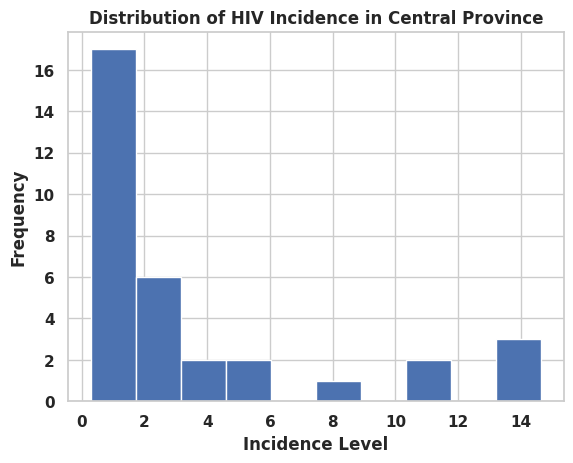

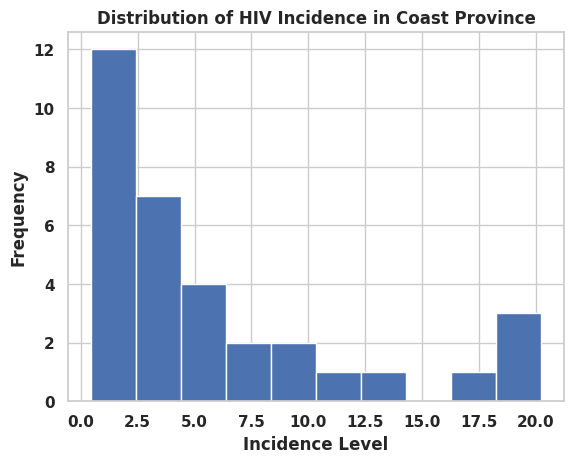

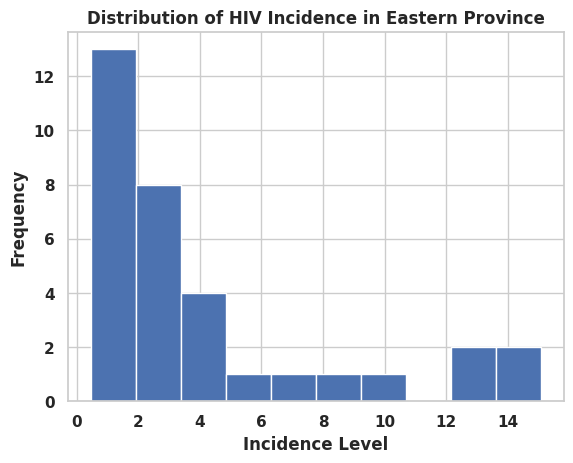

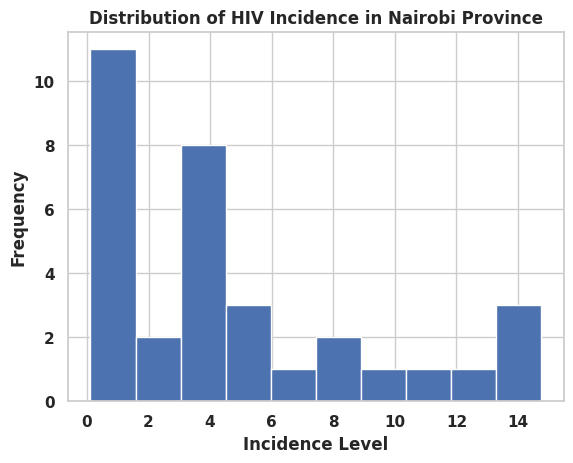

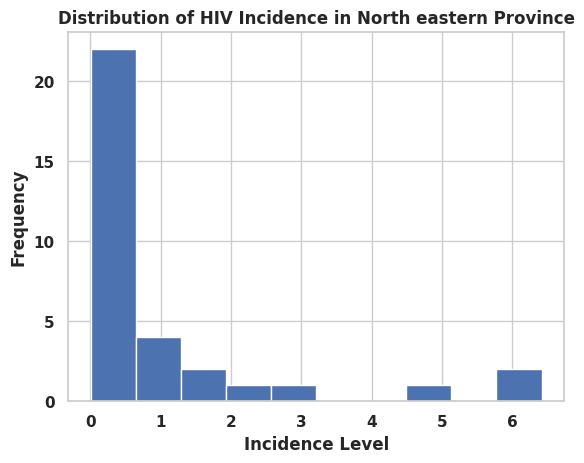

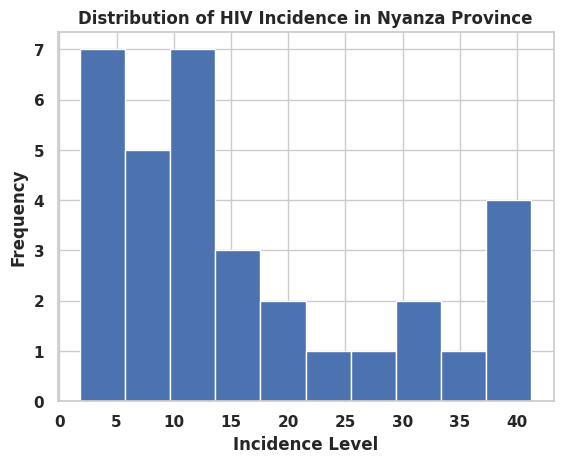

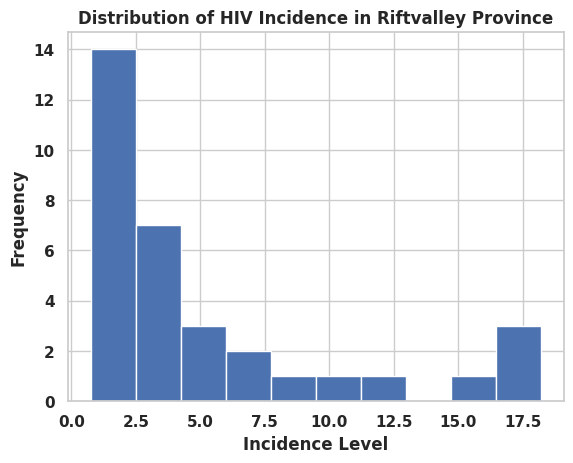

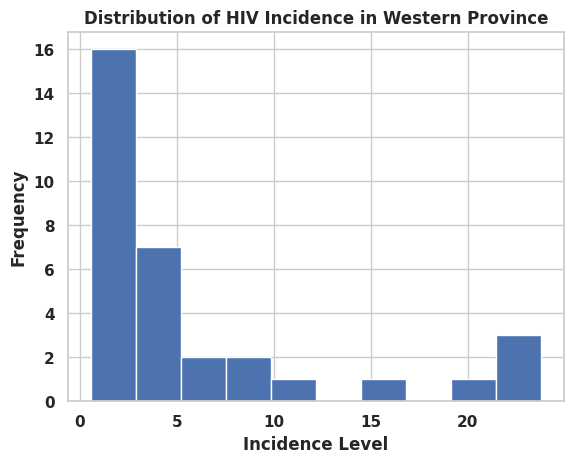

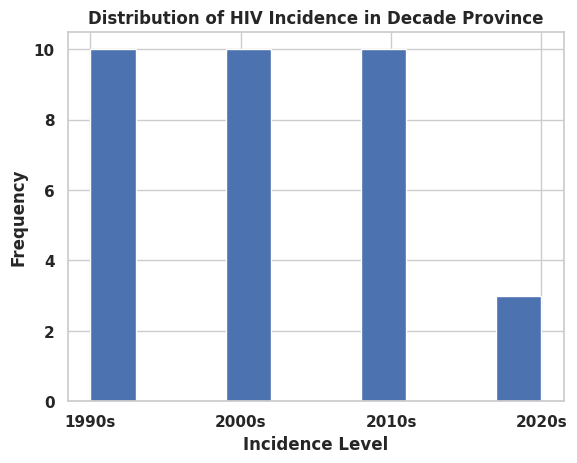

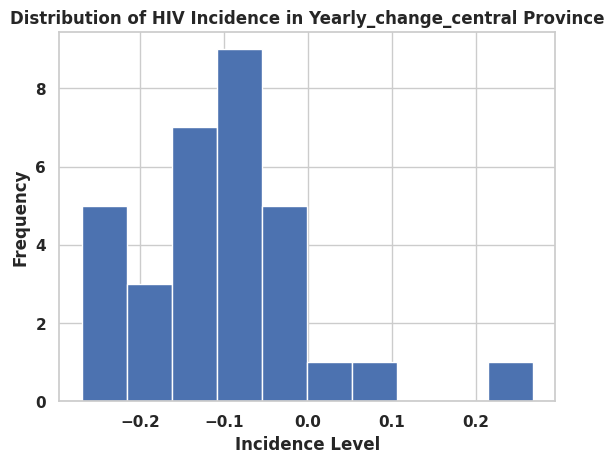

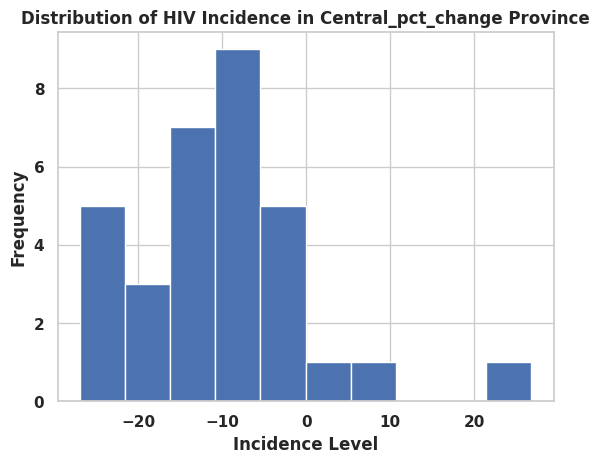

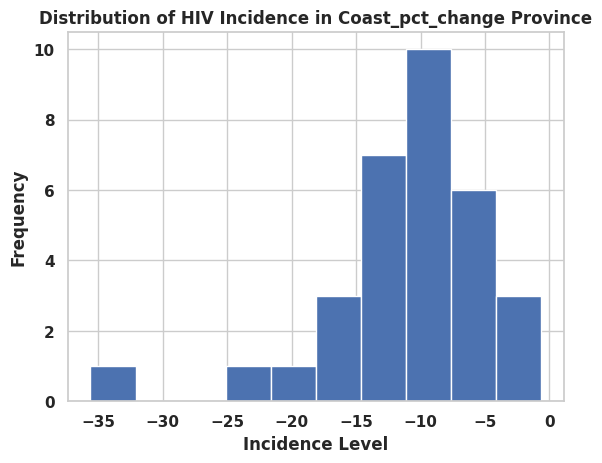

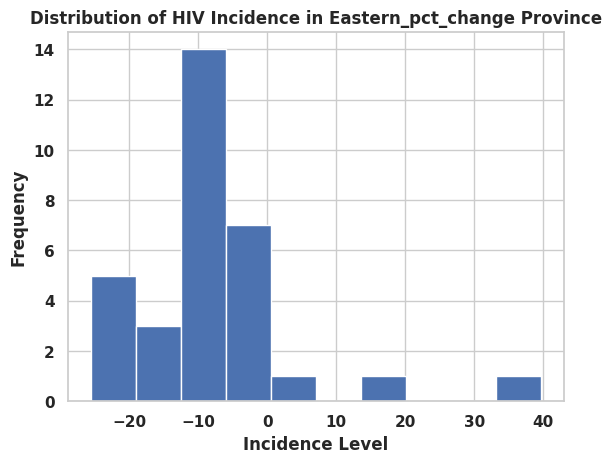

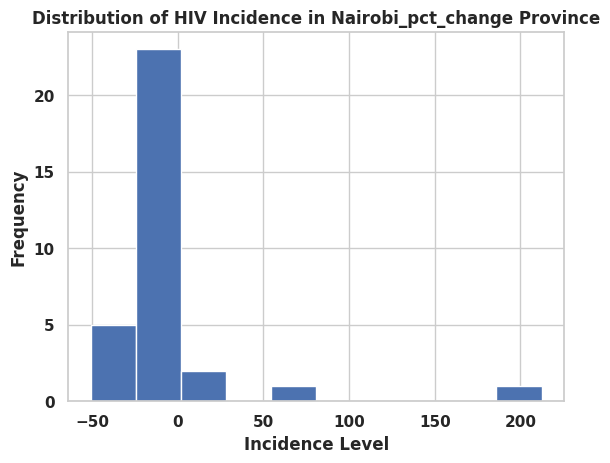

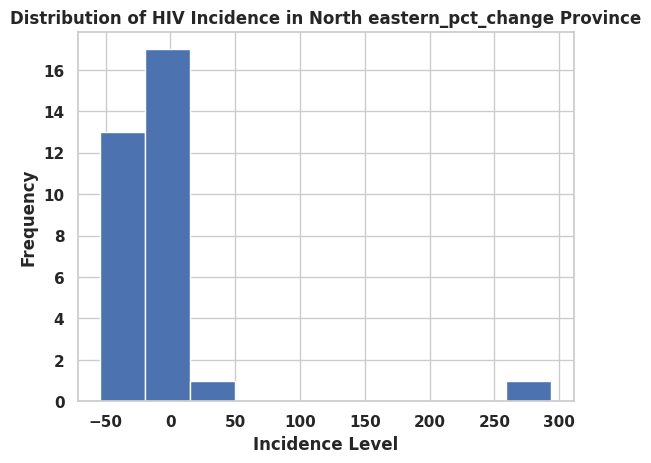

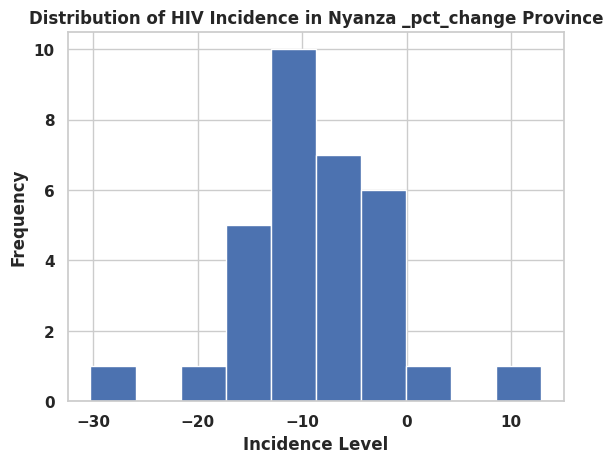

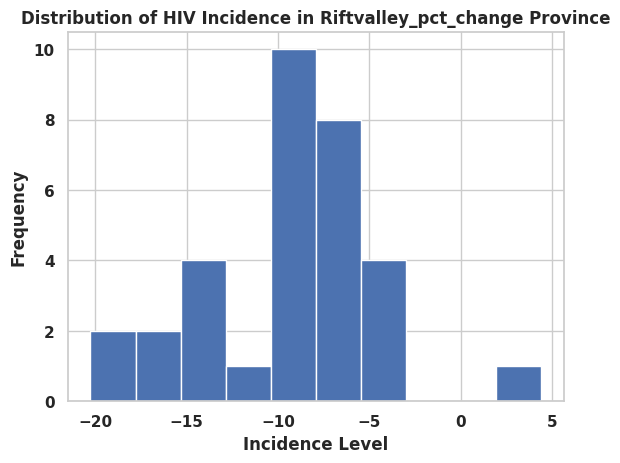

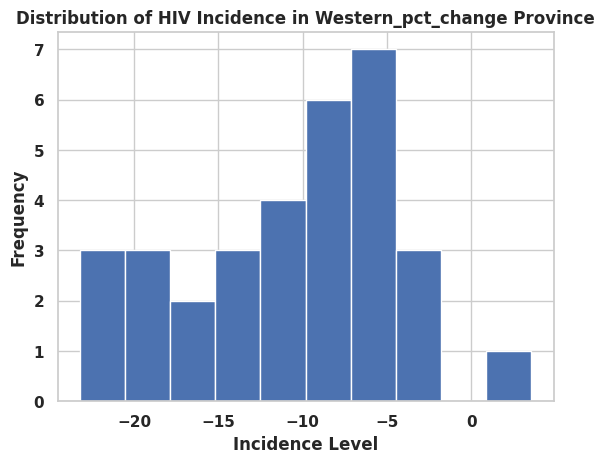

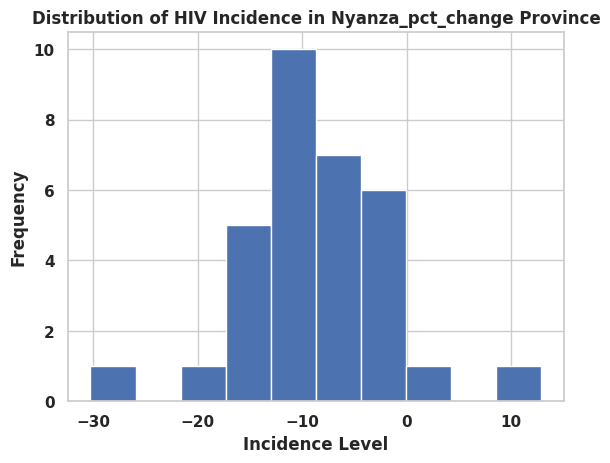

In [272]:
#  list of province columns
province_columns = [col for col in df.columns if col != 'year']

# Plot histograms for each province
for province in province_columns:
    plt.figure()
    df[province].hist()
    plt.title(f'Distribution of HIV Incidence in {province.capitalize()} Province')
    plt.xlabel('Incidence Level')
    plt.ylabel('Frequency')
    plt.show()

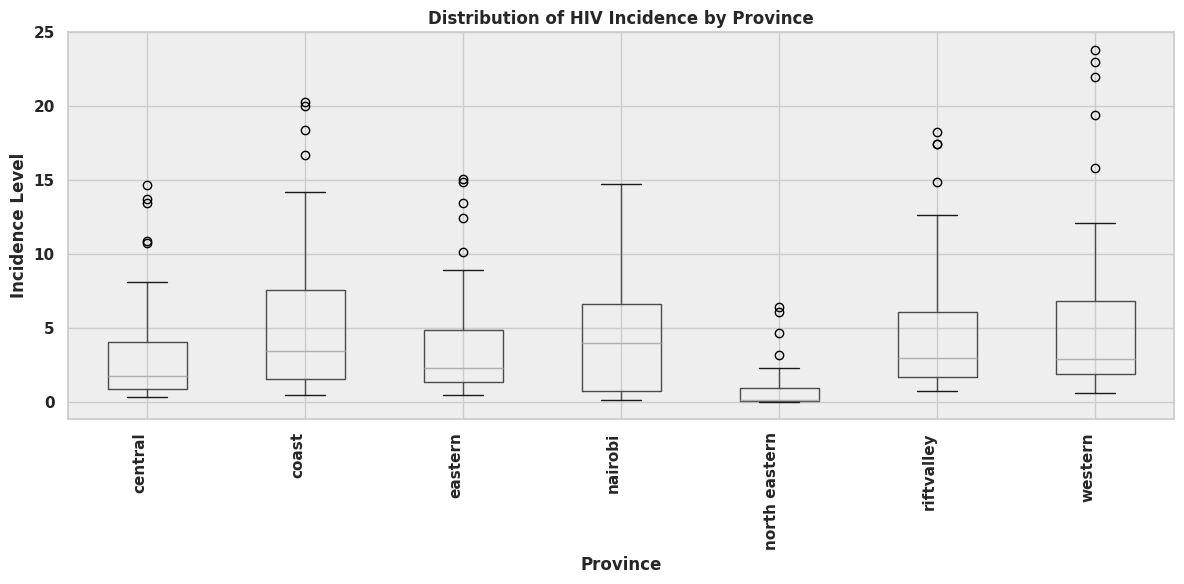

In [189]:
province_columns = [col for col in df.columns if col.lower() in
                    ['central', 'coast', 'eastern', 'nairobi',
                     'north eastern', 'nyanza', 'riftvalley', 'western']]


# Plot boxplots for each province
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
df.boxplot(column=province_columns)
plt.title('Distribution of HIV Incidence by Province')
plt.xlabel('Province')
plt.ylabel('Incidence Level')
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

#**INCIDENCE LEVELS PER PROVINCES 1990-2022 AND INCIDENCE PREDICTION UPTO 2030 USING PROPHET FORECASTING TOOL**

##**Central Province**

**Incidence Trend Central Province**

In [ ]:
#incidence trend in central
df.groupby('year')['central'].value_counts().sort_index(level='central',ascending=False).head()



,,count
year,central,
1992,14.6558,1
1991,13.7527,1
1993,13.4771,1
1990,10.8502,1
1994,10.7443,1


/tmp/ipython-input-1861956238.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




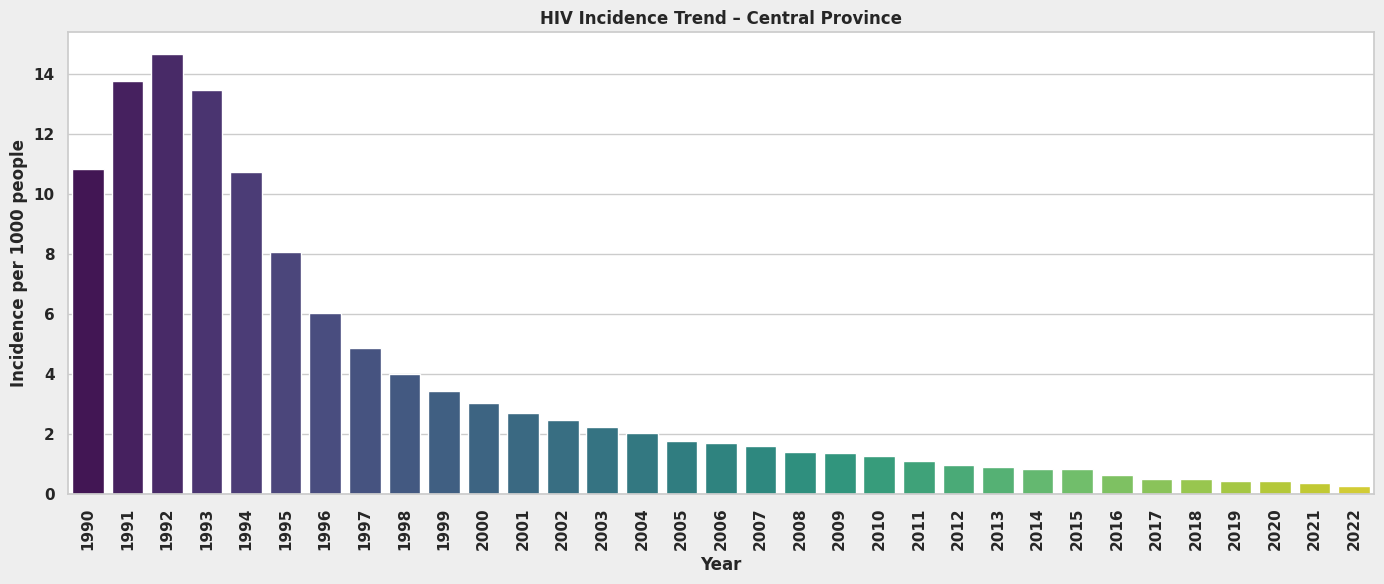

In [268]:
central_trend = df.groupby('year')['central'].mean()


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
sns.barplot(x=central_trend.index, y=central_trend.values,palette='viridis' )
plt.title('HIV Incidence Trend – Central Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('central_incidence_trend.pdf', bbox_inches='tight', dpi=300)
plt.show()

**Forecasted Trend Central Province**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/1txc7e33.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/6omxb4rv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96827', 'data', 'file=/tmp/tmpugee4gce/1txc7e33.json', 'init=/tmp/tmpugee4gce/6omxb4rv.json', 'output', 'file=/tmp/tmpugee4gce/prophet_modeltom47w36/prophet_model-20251007153954.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:39:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



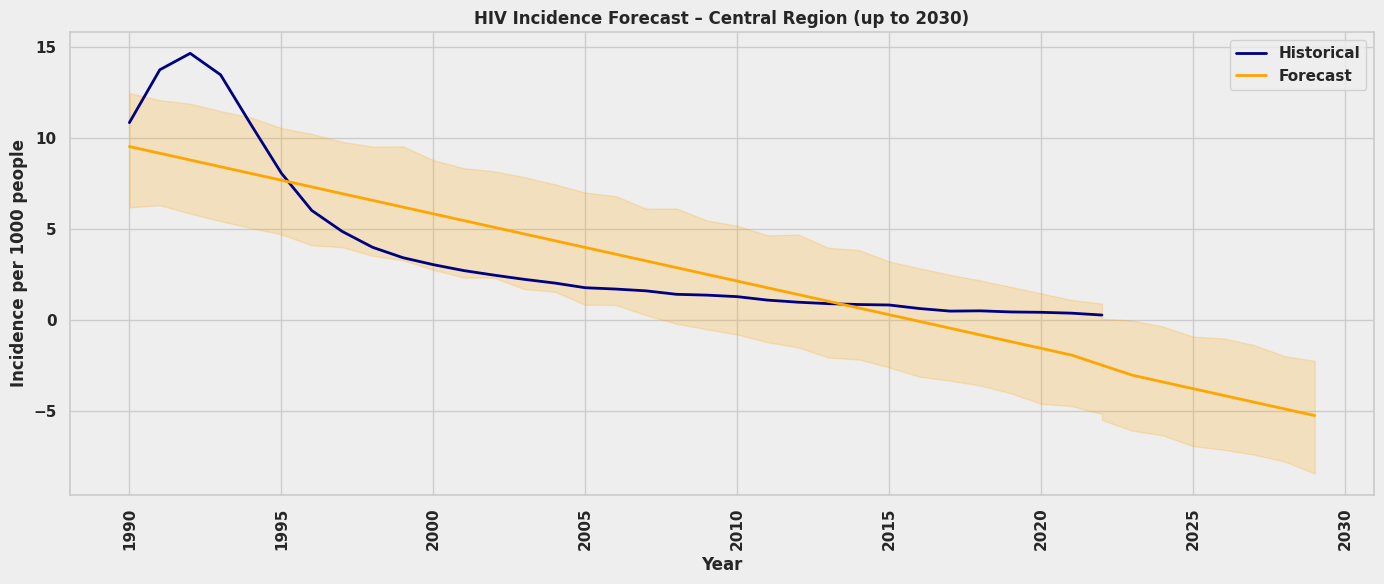

In [191]:

# Preparing the data for Prophet
central_df = df[['year', 'central']].copy()
central_df['year'] = pd.to_datetime(central_df['year'], format='%Y')
central_df = central_df.rename(columns={'year': 'ds', 'central': 'y'})

# Initializing and fitting Prophet model
model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(central_df)

# Making a future dataframe up to 2030
last_year = central_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')

# Generating the forecast
forecast = model.predict(future)

# Plotting historical + forecast
plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Central Region (up to 2030)', fontweight='bold')

# Plotting historical data
sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)

# Plotting forecasted trend
sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)

# Adding confidence interval
plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

# Customizing the chart
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig('central_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**coast province**

**Incidence Trend Coast Province**

In [ ]:
#incidence trend in coast
df.groupby('year')['coast'].value_counts(ascending=False).head()

,,count
year,coast,
1990,20.2611,1
1991,20.0283,1
1992,18.3579,1
1993,16.6915,1
1994,14.1809,1


/tmp/ipython-input-2045787333.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




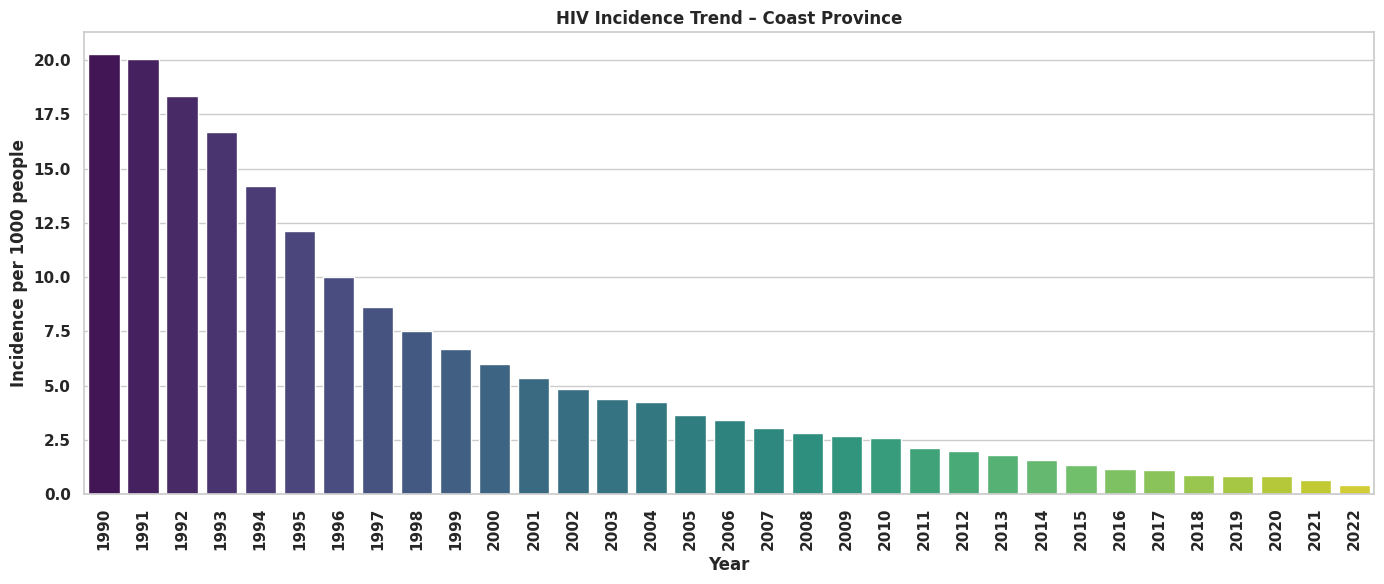

In [269]:

coast_trend = df.groupby('year')['coast'].mean()


plt.figure(figsize=(14,6))
sns.barplot(x=coast_trend.index, y=coast_trend.values, palette='viridis')
plt.title('HIV Incidence Trend – Coast Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('coast_incidence_trend.pdf', bbox_inches='tight')
plt.show()

**Forecasted Trend Coast Province**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/d8pxtp6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/_beq3rn0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40523', 'data', 'file=/tmp/tmpugee4gce/d8pxtp6k.json', 'init=/tmp/tmpugee4gce/_beq3rn0.json', 'output', 'file=/tmp/tmpugee4gce/prophet_model7u7uei7y/prophet_model-20251007154006.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:40:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



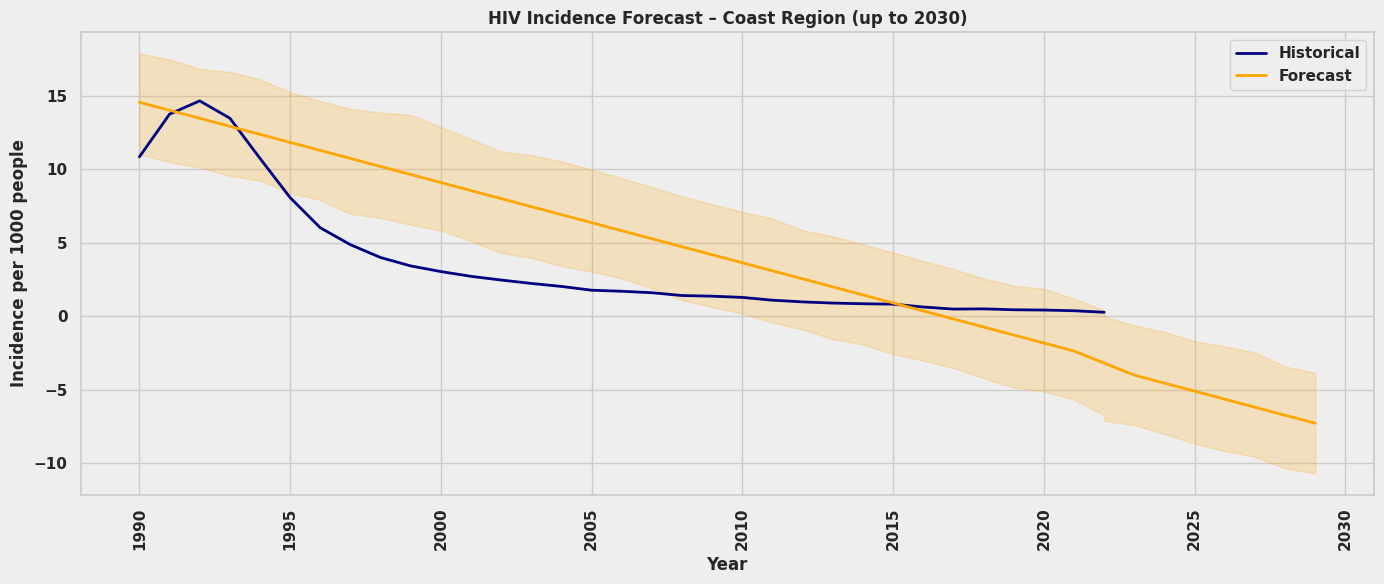

In [193]:

coast_df = df[['year', 'coast']].copy()
coast_df['year'] = pd.to_datetime(coast_df['year'], format='%Y')
coast_df = coast_df.rename(columns={'year': 'ds', 'coast': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(coast_df)

last_year = coast_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Coast Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**Eastern Province**

**Eastern province Trend**

In [194]:
#Eastern trend
df.groupby('year')['eastern'].value_counts().head().sort_index(level='eastern',ascending=False)


,,count
year,eastern,
1993-01-01,15.0924,1
1992-01-01,14.8788,1
1994-01-01,13.4570,1
1991-01-01,12.4468,1
1990-01-01,8.9075,1


/tmp/ipython-input-2737316885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eastern_trend.index,y=eastern_trend.values,palette='viridis')


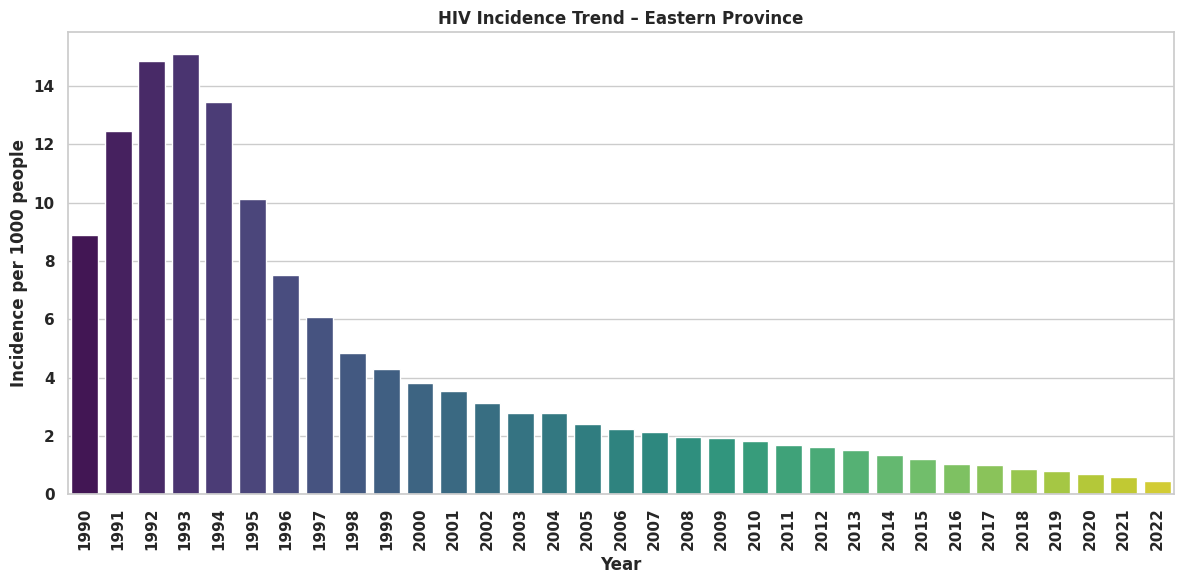

In [ ]:
eastern_trend=df.groupby('year')['eastern'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=eastern_trend.index,y=eastern_trend.values,palette='viridis')
plt.title('HIV Incidence Trend – Eastern Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('eastern_incidence_trend.pdf', bbox_inches='tight')
plt.show()

**Forecasted Trend Eastern Province**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/mevr1onv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/cbcdgigk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58788', 'data', 'file=/tmp/tmpugee4gce/mevr1onv.json', 'init=/tmp/tmpugee4gce/cbcdgigk.json', 'output', 'file=/tmp/tmpugee4gce/prophet_model6cv2w0zy/prophet_model-20251007154015.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:40:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



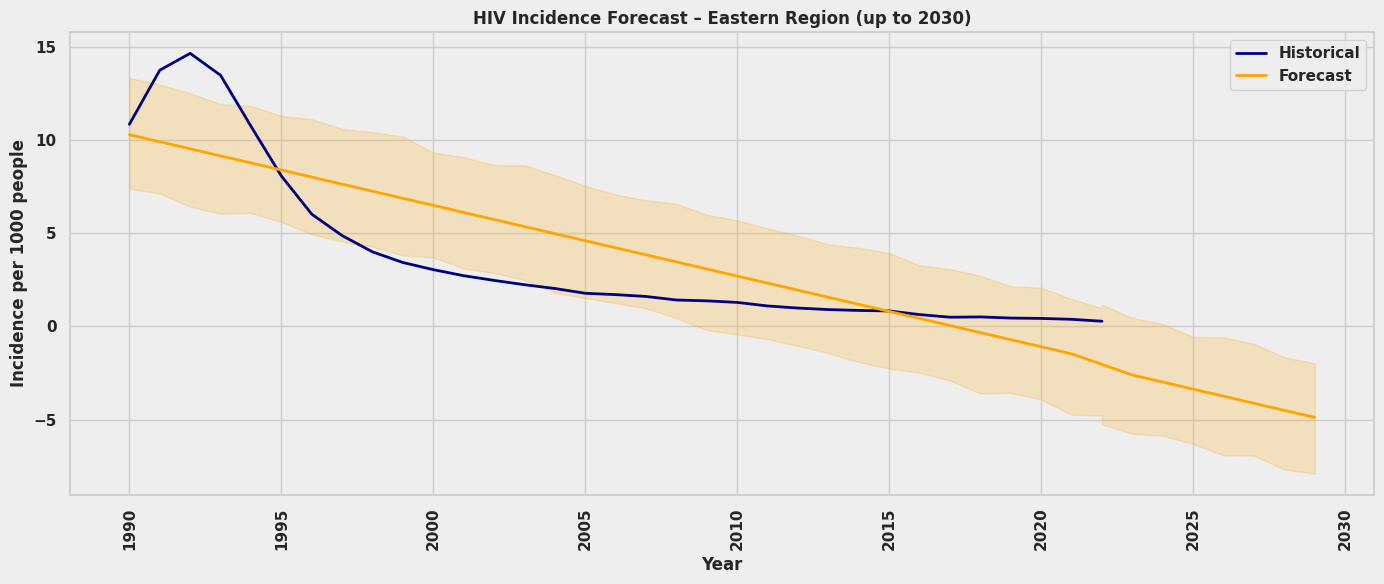

In [195]:
eastern_df = df[['year', 'eastern']].copy()
eastern_df['year'] = pd.to_datetime(eastern_df['year'], format='%Y')
eastern_df = eastern_df.rename(columns={'year': 'ds', 'eastern': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(eastern_df)

last_year = eastern_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Eastern Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()




##**Nairobi Province**

**Incidence Trend Nairobi Province**

In [264]:
df.groupby('year')['nairobi'].value_counts().head()

,,count
year,nairobi,
1990-01-01,14.6626,1
1991-01-01,14.7560,1
1992-01-01,14.1296,1
1993-01-01,12.9440,1
1994-01-01,11.2417,1


/tmp/ipython-input-82437966.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




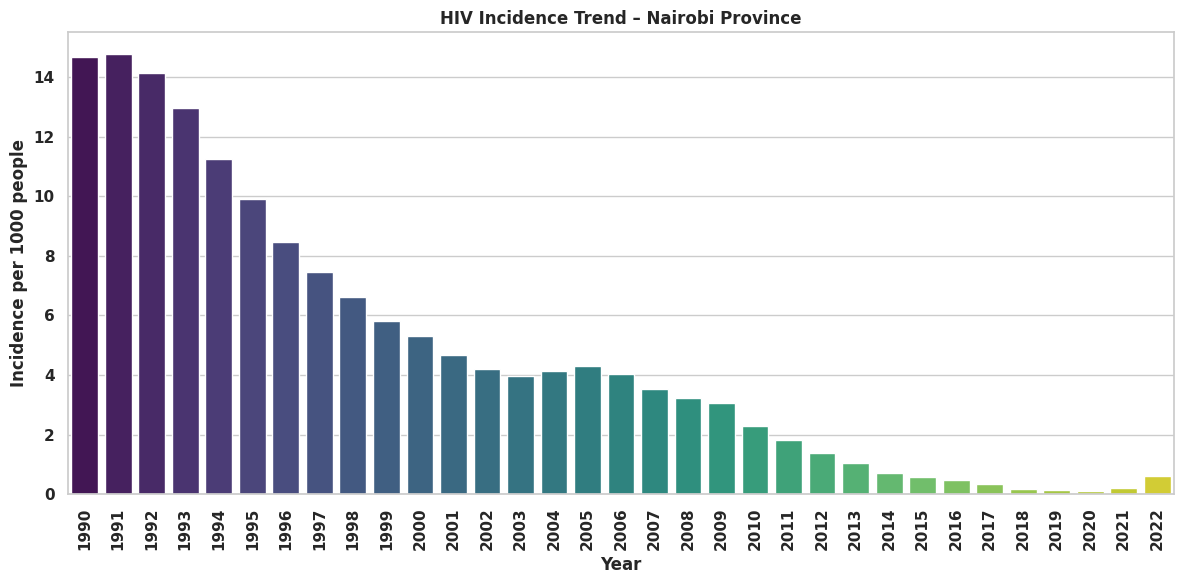

In [270]:
nairobi_trend=df.groupby('year')['nairobi'].mean()
plt.figure(figsize=(12,6))

sns.barplot(x=nairobi_trend.index,y=nairobi_trend.values,palette='viridis')
plt.title('HIV Incidence Trend – Nairobi Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('Nairobi_incidence_trend.pdf', bbox_inches='tight')
plt.show()

**Forecasted Trend Nairobi Region**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/n1svrfh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/elbztpi4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35960', 'data', 'file=/tmp/tmpugee4gce/n1svrfh6.json', 'init=/tmp/tmpugee4gce/elbztpi4.json', 'output', 'file=/tmp/tmpugee4gce/prophet_model8pcpsqpu/prophet_model-20251007154028.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:40:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



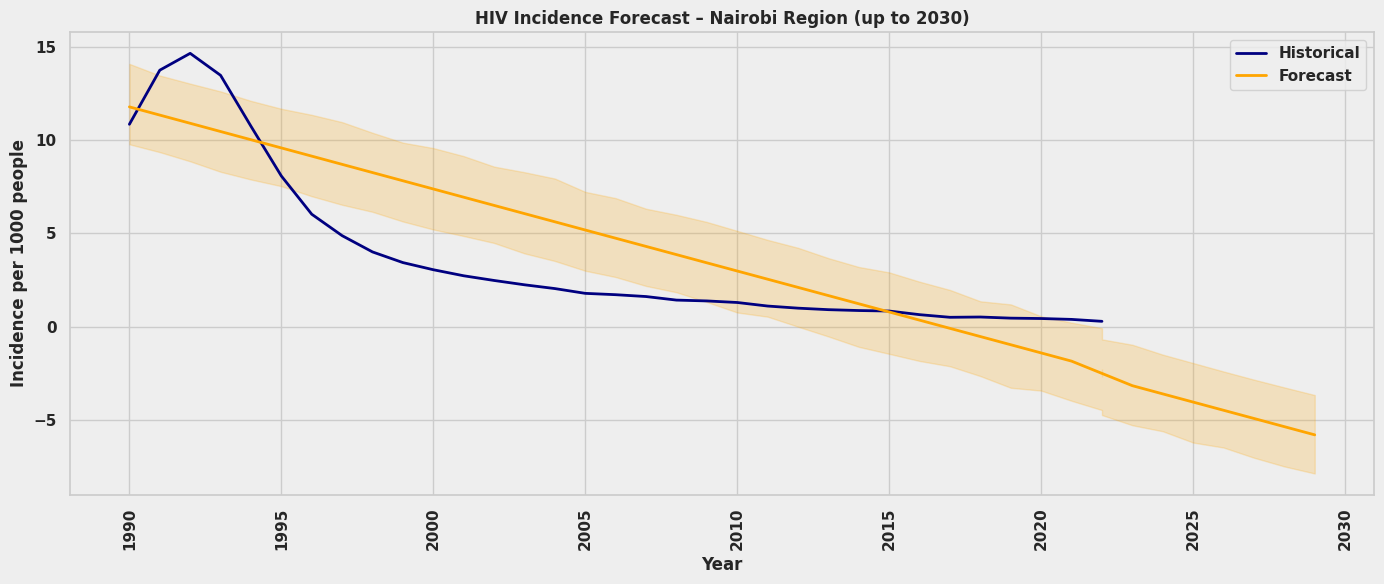

In [197]:
nairobi_df = df[['year', 'nairobi']].copy()
nairobi_df['year'] = pd.to_datetime(nairobi_df['year'], format='%Y')
nairobi_df = nairobi_df.rename(columns={'year': 'ds', 'nairobi': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(nairobi_df)

last_year = nairobi_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Nairobi Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**North Eastern**

**Incidence Trend North Eastern Province**

In [ ]:
df.groupby('year')['north eastern'].value_counts().head()

,,count
year,north eastern,
1990,6.4174,1
1991,6.0646,1
1992,4.6525,1
1993,3.1492,1
1994,2.2910,1


/tmp/ipython-input-3686709081.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




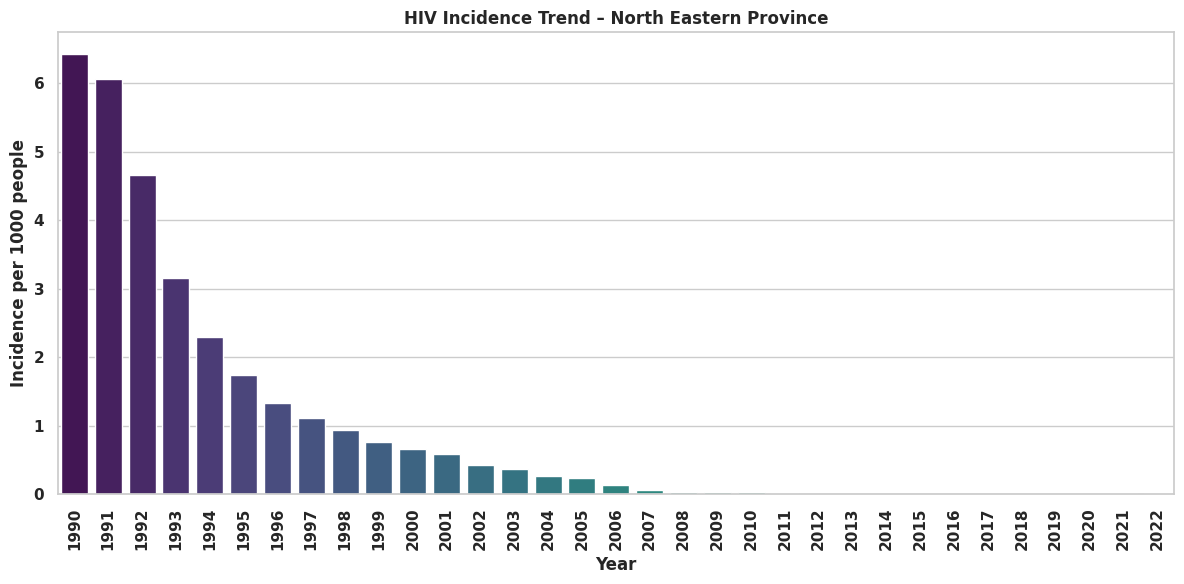

In [271]:
north_eastern_trend=df.groupby('year')['north eastern'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=north_eastern_trend.index,y=north_eastern_trend.values, palette='viridis')
plt.title('HIV Incidence Trend – North Eastern Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('NE_incidence_trend.pdf', bbox_inches='tight')
plt.show()


**Forecasted Trend North Eastern Region**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/6o3ifwsx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/jdd717pb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15628', 'data', 'file=/tmp/tmpugee4gce/6o3ifwsx.json', 'init=/tmp/tmpugee4gce/jdd717pb.json', 'output', 'file=/tmp/tmpugee4gce/prophet_model1y023zir/prophet_model-20251007150052.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:00:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:00:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



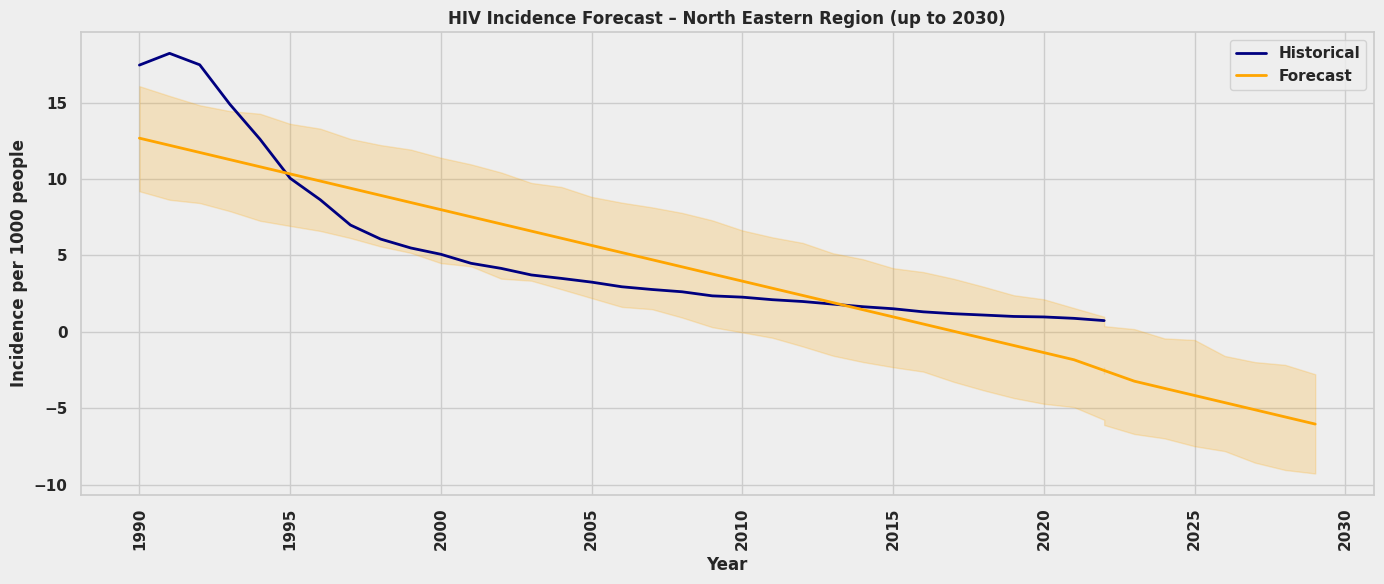

In [164]:
NE_df = df[['year', 'north eastern']].copy()
NE_df['year'] = pd.to_datetime(NE_df['year'], format='%Y')
NE_df = central_df.rename(columns={'year': 'ds', 'north eastern': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(NE_df)

last_year = NE_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – North Eastern Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**Nyanza**

**Incidence Trend Nyanza Province**

In [ ]:
df.groupby('year')['nyanza '].value_counts().head()

,,count
year,nyanza,
1990,35.3064,1
1991,39.8624,1
1992,41.2166,1
1993,40.2621,1
1994,37.3430,1


/tmp/ipython-input-1733389469.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nyanza_trend.index,y=nyanza_trend.values,palette='viridis')


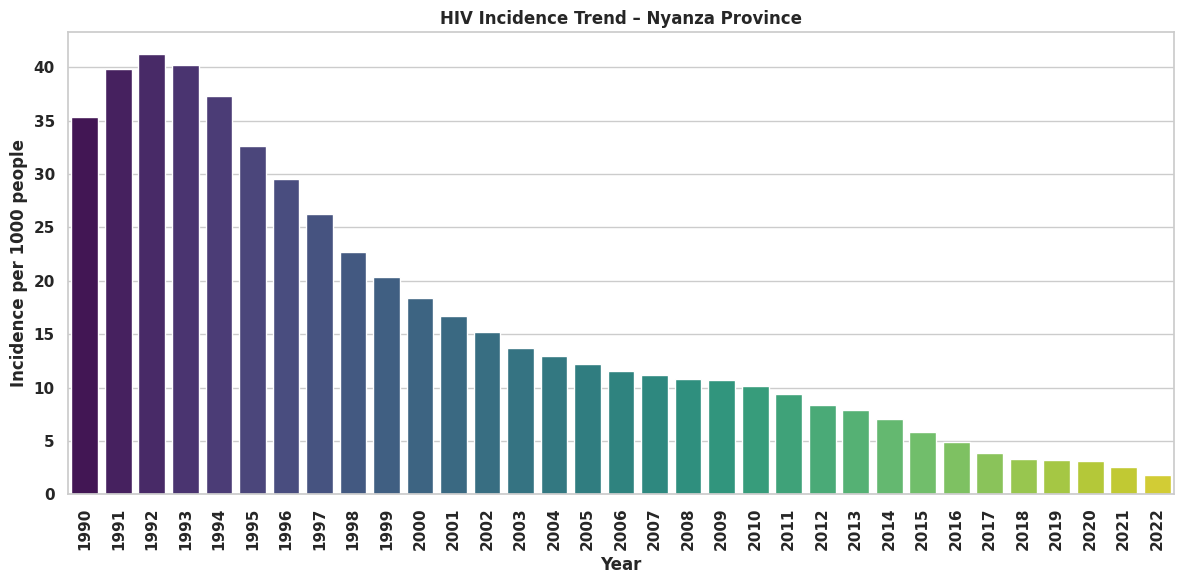

In [ ]:
nyanza_trend=df.groupby('year')['nyanza '].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=nyanza_trend.index,y=nyanza_trend.values,palette='viridis')
plt.title('HIV Incidence Trend – Nyanza Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('Nyanza_incidence_trend.pdf', bbox_inches='tight')
plt.show()



**Forecasted Trend Nyanza Region**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/o7lq6l5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/6v0wnpt6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73918', 'data', 'file=/tmp/tmpugee4gce/o7lq6l5k.json', 'init=/tmp/tmpugee4gce/6v0wnpt6.json', 'output', 'file=/tmp/tmpugee4gce/prophet_modelffpwo76r/prophet_model-20251007145953.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:59:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



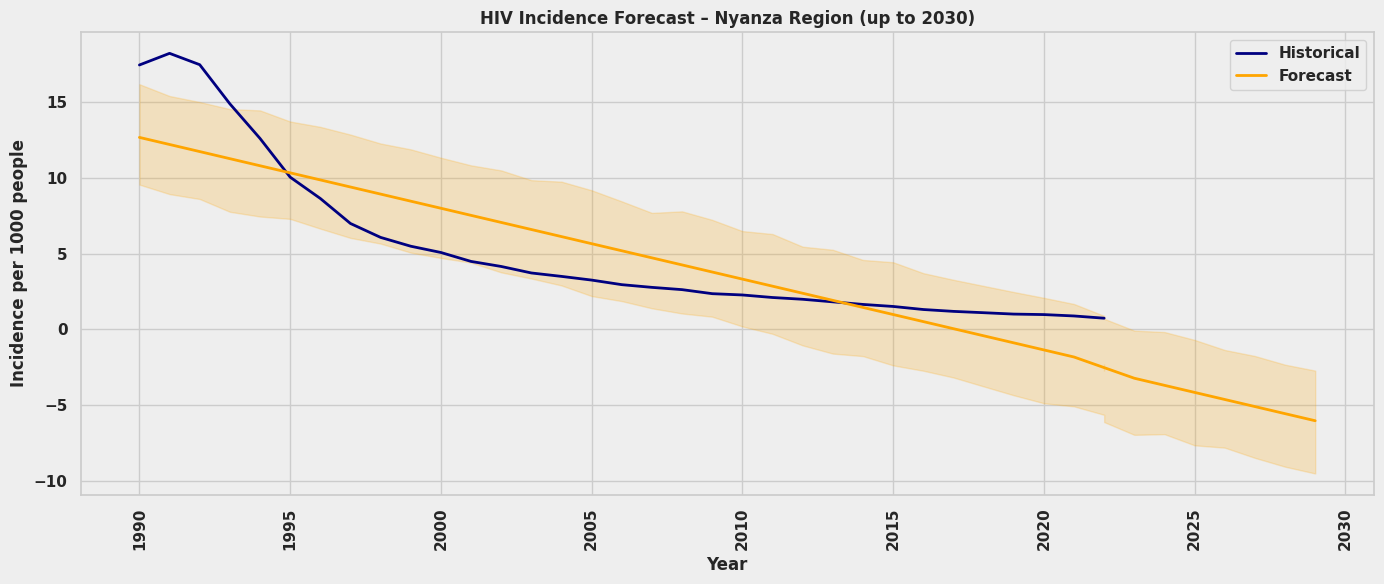

In [163]:
nyanza_df = df[['year', 'nyanza ']].copy()
nyanza_df['year'] = pd.to_datetime(nyanza_df['year'], format='%Y')
nyanza_df = central_df.rename(columns={'year': 'ds', 'nyanza ': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(nyanza_df)

last_year = nyanza_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Nyanza Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**RiftValley**

**Incidence Trend Riftvalley province**

In [ ]:
df.groupby('year')['riftvalley'].value_counts().head()

,,count
year,riftvalley,
1990,17.4566,1
1991,18.2252,1
1992,17.4761,1
1993,14.8927,1
1994,12.6077,1


/tmp/ipython-input-4110248656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=riftvalley_trend.index, y=riftvalley_trend.values, palette='viridis')


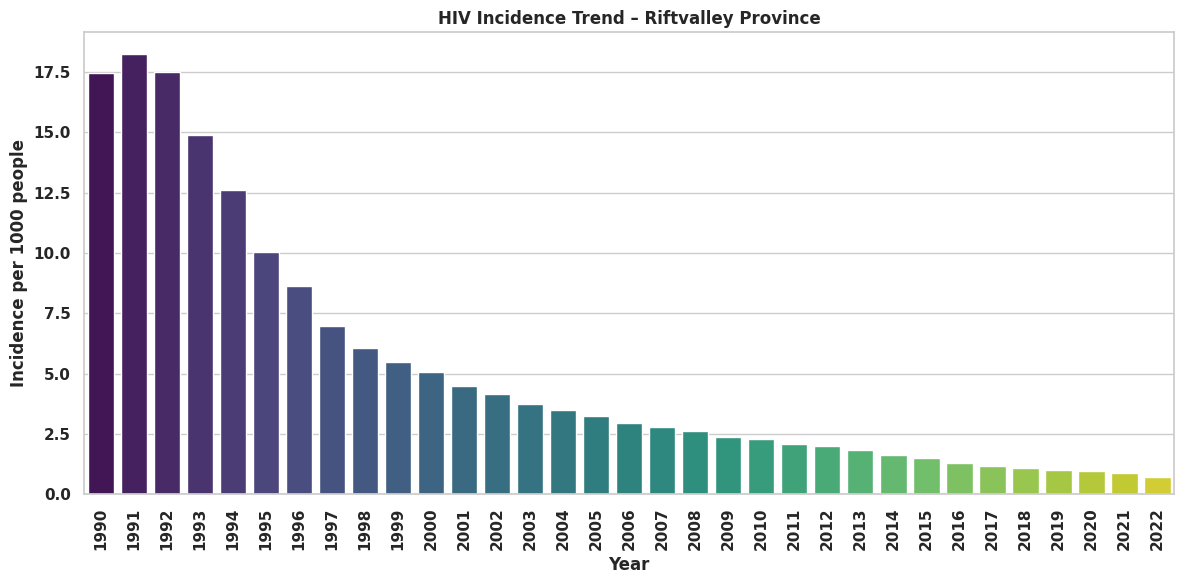

In [ ]:
riftvalley_trend=df.groupby('year')['riftvalley'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=riftvalley_trend.index, y=riftvalley_trend.values, palette='viridis')
plt.title('HIV Incidence Trend – Riftvalley Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('Rift_incidence_trend.pdf', bbox_inches='tight')
plt.show()


**Forecasted Trend Riftvalley Region**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/gme9kc16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/n_dqkpbi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7288', 'data', 'file=/tmp/tmpugee4gce/gme9kc16.json', 'init=/tmp/tmpugee4gce/n_dqkpbi.json', 'output', 'file=/tmp/tmpugee4gce/prophet_modelcl23hlqj/prophet_model-20251007145554.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:55:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



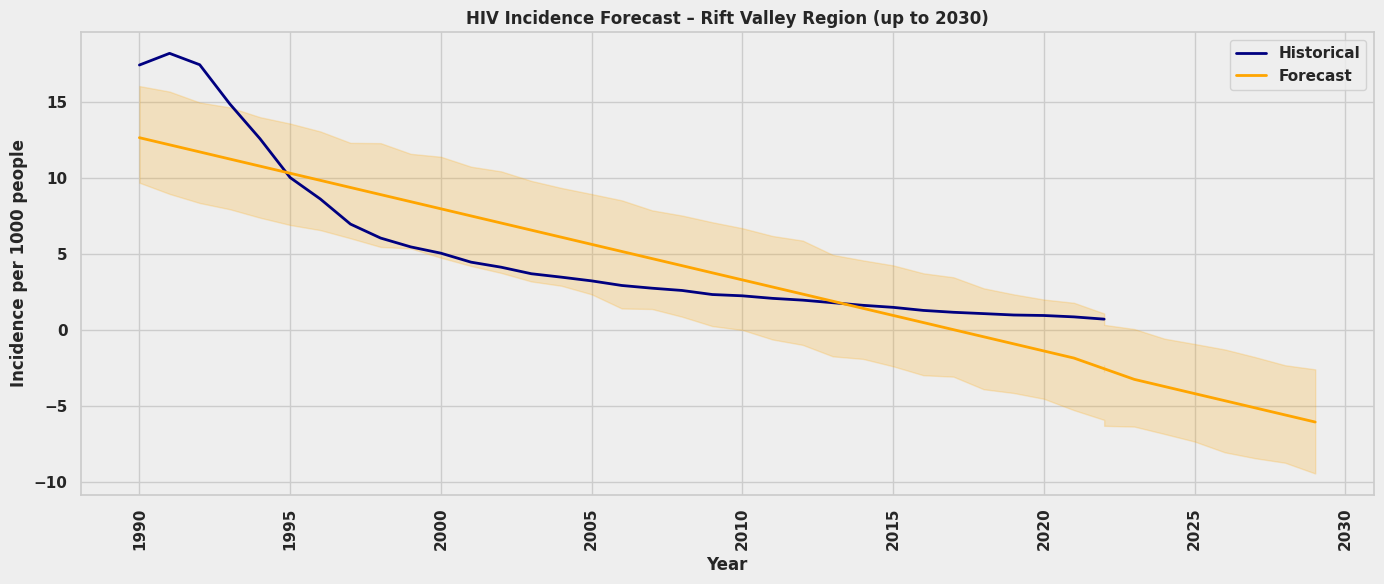

In [160]:
rift_df = df[['year', 'riftvalley']].copy()
rift_df['year'] = pd.to_datetime(rift_df['year'], format='%Y')
rift_df = rift_df.rename(columns={'year': 'ds', 'riftvalley': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(rift_df)

last_year = rift_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Rift Valley Region (up to 2030)', fontweight='bold')


sns.lineplot(x=rift_df['ds'].dt.year, y=rift_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


##**western**

**Incidence Trend Western Province**

In [ ]:
df.groupby('year')['western'].value_counts().head()

,,count
year,western,
1990,22.9993,1
1991,23.8143,1
1992,21.9611,1
1993,19.4072,1
1994,15.7901,1


/tmp/ipython-input-3303309077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=western_trend.index,y=western_trend.values, palette='viridis')


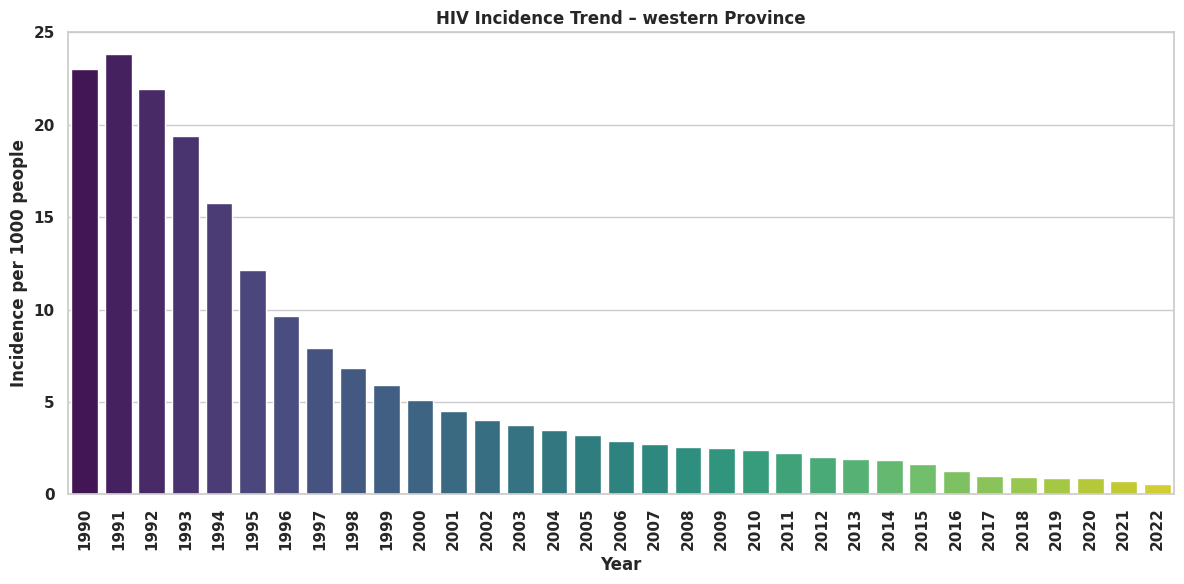

In [ ]:
western_trend=df.groupby('year')['western'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=western_trend.index,y=western_trend.values, palette='viridis')
plt.title('HIV Incidence Trend – western Province', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig('western_incidence_trend.pdf', bbox_inches='tight')
plt.show()


**Forecasted Trend Western Region**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/eoj9ay_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpugee4gce/akw_1ipd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98240', 'data', 'file=/tmp/tmpugee4gce/eoj9ay_b.json', 'init=/tmp/tmpugee4gce/akw_1ipd.json', 'output', 'file=/tmp/tmpugee4gce/prophet_model2wxfrxxs/prophet_model-20251007145846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



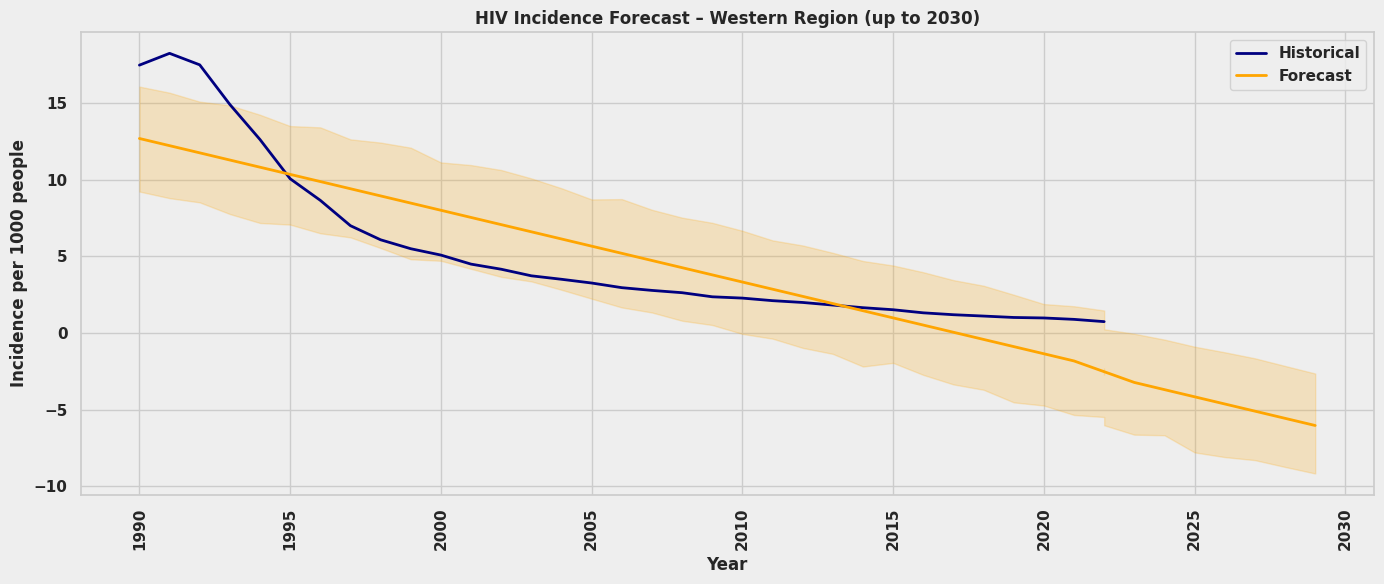

In [162]:
west_df = df[['year', 'western']].copy()
west_df['year'] = pd.to_datetime(west_df['year'], format='%Y')
west_df = central_df.rename(columns={'year': 'ds', 'western': 'y'})

model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(west_df)

last_year = west_df['ds'].dt.year.max()
future_periods = 2030 - last_year
future = model.make_future_dataframe(periods=future_periods, freq='Y')


forecast = model.predict(future)


plt.figure(figsize=(14,6), facecolor='#EEEEEE')
plt.title('HIV Incidence Forecast – Western Region (up to 2030)', fontweight='bold')


sns.lineplot(x=central_df['ds'].dt.year, y=central_df['y'], label='Historical', color='navy', linewidth=2)


sns.lineplot(x=forecast['ds'].dt.year, y=forecast['yhat'], label='Forecast', color='orange', linewidth=2)


plt.fill_between(forecast['ds'].dt.year, forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontweight='bold')
plt.xticks(fontweight='bold', rotation=90)
plt.yticks(fontweight='bold')
plt.legend()
plt.tight_layout()


plt.savefig('coast_incidence_forecast_2030.pdf', bbox_inches='tight', dpi=300)
plt.show()


#**overall province comparison**

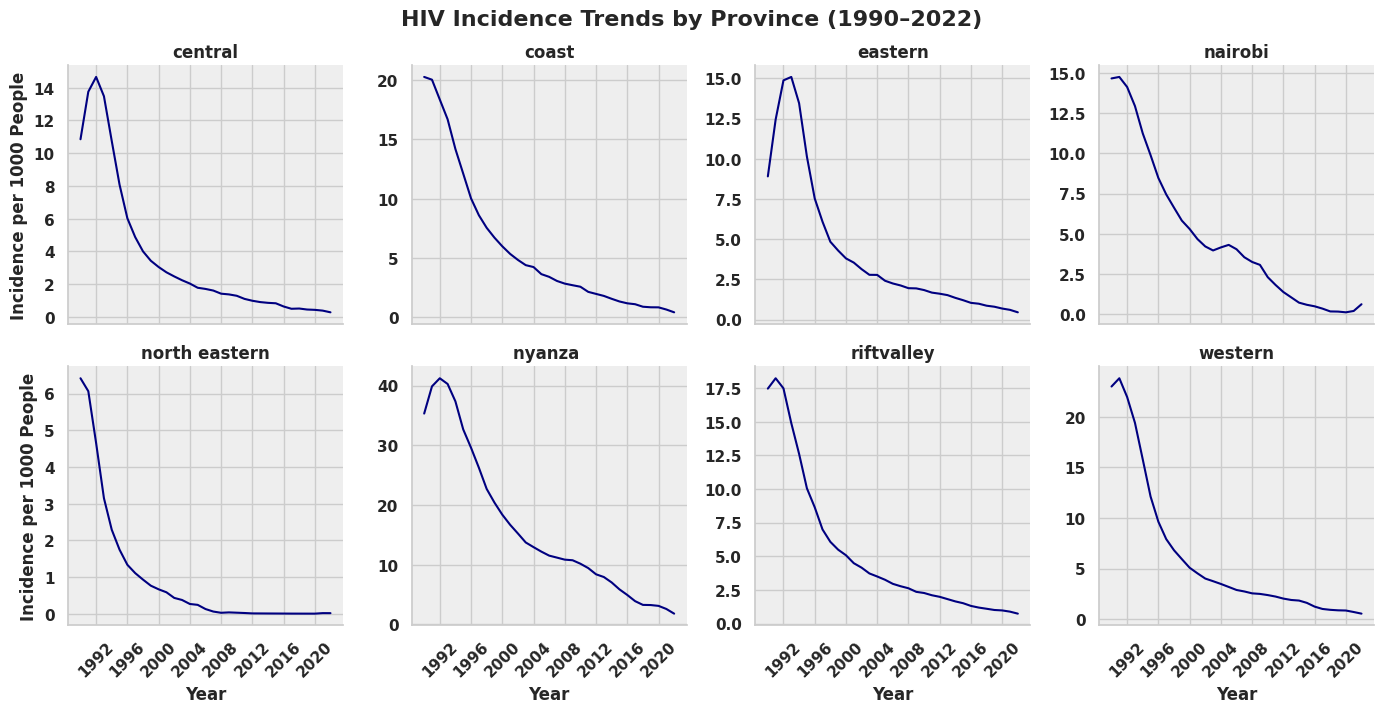

In [199]:
# Defining only the real province columns
province_columns = [
    'central', 'coast', 'eastern', 'nairobi',
    'north eastern', 'nyanza ', 'riftvalley', 'western'
]

# Melting only those columns
df_melted = df.melt(
    id_vars='year',
    value_vars=province_columns,
    var_name='province',
    value_name='incidence'
)

# Creating grid of subplots
grid = sns.FacetGrid(df_melted, col='province', col_wrap=4, height=3.5, sharey=False)
grid.map_dataframe(sns.lineplot, x='year', y='incidence', color='navy')
grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('Year', 'Incidence per 1000 People')

for ax in grid.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_facecolor('#EEEEEE')

plt.subplots_adjust(top=0.9)
grid.fig.suptitle('HIV Incidence Trends by Province (1990–2022)', fontsize=16, fontweight='bold')
plt.show()


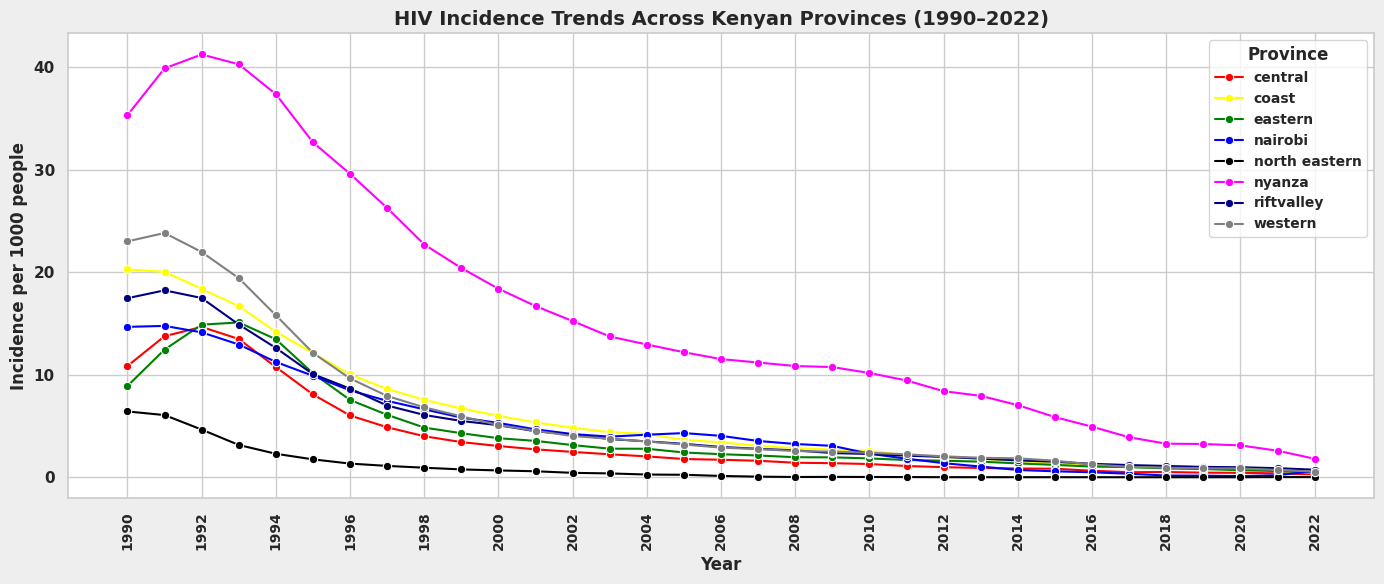

In [259]:

province_columns = [
    'central', 'coast', 'eastern', 'nairobi',
    'north eastern', 'nyanza', 'riftvalley', 'western'
]

df_melted = df.melt(
    id_vars='year',
    value_vars=province_columns,
    var_name='province',
    value_name='incidence'
)

# Converting year to datetime
df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')

sns.set_theme(style="whitegrid")

color_map = {
    'central': 'red',
    'coast': 'yellow',
    'eastern': 'green',
    'nairobi': 'blue',
    'north eastern': 'black',
    'nyanza': 'magenta',
    'western': 'grey',
    'riftvalley': 'navy'
}

plt.figure(figsize=(14, 6), facecolor='#EEEEEE')
sns.lineplot(
    data=df_melted,
    x='year', y='incidence',
    hue='province',
    palette=color_map,
    marker='o'
)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=90, fontsize=10, fontweight='bold')

plt.title('HIV Incidence Trends Across Kenyan Provinces (1990–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Incidence per 1000 people', fontsize=12, fontweight='bold')
plt.legend(title='Province', fontsize=10)
plt.tight_layout()
plt.savefig('hiv_incidence_all_provinces.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [208]:

columns_to_mean=province_columns
mean_value=df.mean()
print(mean_value)

year                        2005-12-31 21:05:27.272727296
central                                          3.620512
coast                                            5.828988
eastern                                          4.215773
nairobi                                          4.739336
north eastern                                    0.953345
nyanza                                          16.081709
riftvalley                                       5.194236
western                                           6.04333
decade                                        2001.818182
yearly_change_central                           -0.102357
central_pct_change                             -10.235702
coast_pct_change                               -11.118308
eastern_pct_change                              -8.179633
nairobi_pct_change                              -4.274444
north eastern_pct_change                        -9.171068
nyanza _pct_change                              -8.554797
riftvalley_pct

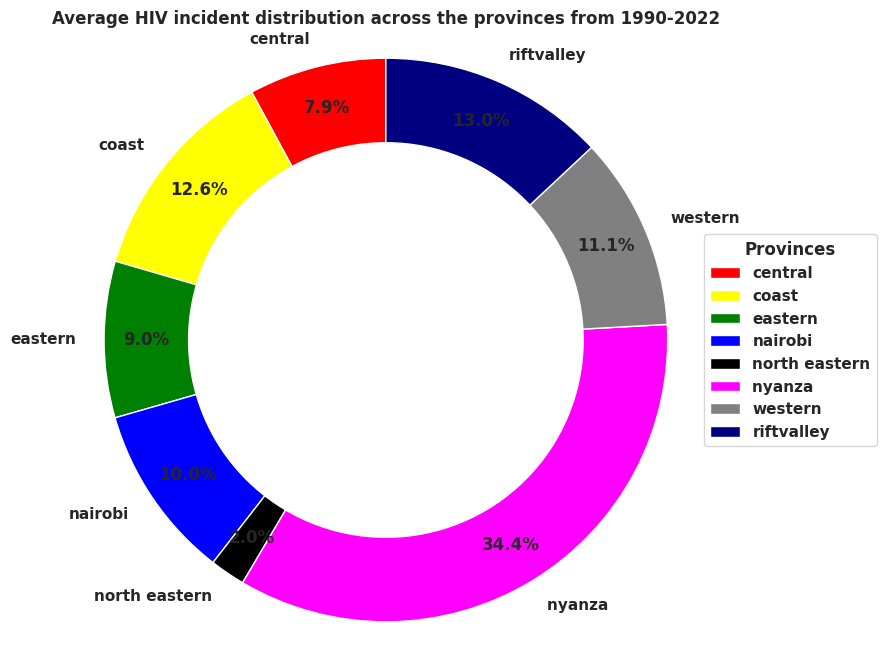

In [209]:
# average incident distribution across the provinces from 1990-2022
labels = ['central', 'coast','eastern', 'nairobi', 'north eastern', 'nyanza ', 'western', 'riftvalley']
values = [3.7,5.9,4.2, 4.7, 0.95, 16.1, 5.2, 6.1]
custom_colors = ['red', 'yellow', 'green', 'blue', 'black', 'magenta', 'grey', 'navy']

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=custom_colors)

# Drawing a circle at the center of the pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Average HIV incident distribution across the provinces from 1990-2022', fontweight='bold')
plt.axis('equal')
plt.legend(title="Provinces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Nyanza province has has had the highest incident rate across the 32 year time period with peak incidence in 1992 and lowest incidence in 2022.**

**North eastern province has consistently exhibited the lowwest incident rate across the time period with its highest peak year being 1990 and the lowest incidence being in 2022.**

**Overally 2022 exhibited the lowest incidence rate across all the provinces**

**Nyanza province leads with the highest average incidence rate per 1000 people from 1990 to 2022. It is followed by western, coast, riftvalley, nairobi, eastern, central, and North eastern.**

##**FEATURE EXTRACTION**

##**Average incidence Distribution across the decades**

##**Provincial Yearly Change**

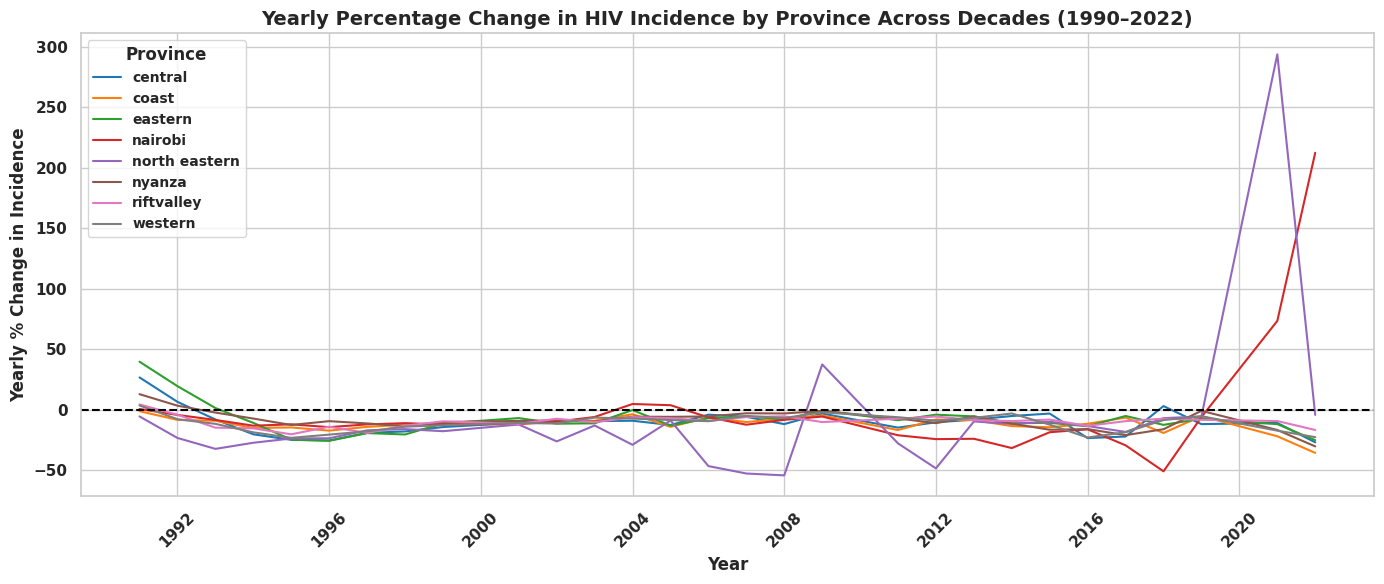

In [253]:
# Ensuring 'year' is datetime and 'decade' is calculated
df['year'] = pd.to_datetime(df['year'])

# Defining the decades based on year ranges
def assign_decade(year):
    if 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    elif 2010 <= year < 2020:
        return '2010s'
    elif 2020 <= year <= 2029: # Adjusted to include 2020-2022 data
        return '2020s'
    else:
        return 'Other' # Handling any years outside the specified decades

df['decade'] = df['year'].dt.year.apply(assign_decade)


# Calculating yearly percentage change within each defined decade
df_decade_change = df.copy()
for col in province_columns:
    # Grouping by the assigned 'decade' and calculating percentage change
    df_decade_change[f'{col}_pct_change_decade'] = df_decade_change.groupby('decade')[col].pct_change() * 100

# Melting the dataframe for plotting
change_decade_columns = [f'{col}_pct_change_decade' for col in province_columns]
df_change_decade_melted = df_decade_change.melt(id_vars=['year', 'decade'], value_vars=change_decade_columns,
                                                var_name='province', value_name='yearly_change_in_decade')

# Cleaning province names
df_change_decade_melted['province'] = df_change_decade_melted['province'].str.replace('_pct_change_decade', '')

# Plotting yearly change within decades
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_change_decade_melted, x='year', y='yearly_change_in_decade', hue='province', palette='tab10')

plt.axhline(0, color='black', linestyle='--')  # baseline
plt.title('Yearly Percentage Change in HIV Incidence by Province Across Decades (1990–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Yearly % Change in Incidence', fontsize=12, fontweight='bold')
plt.legend(title='Province', fontsize=10)
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

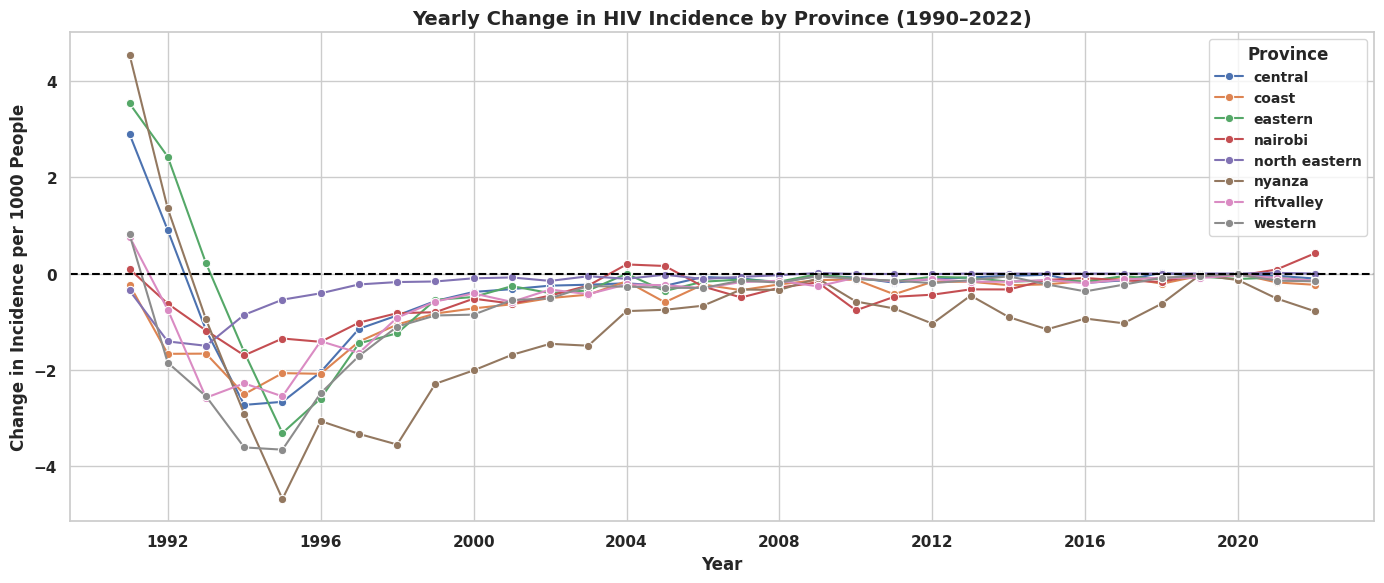

In [230]:
# Computing yearly change per province
df_change = df.copy()
for col in province_columns:
    df_change[f'{col}_yearly_change'] = df_change[col].diff()

# Melting only the change columns
change_columns = [f'{col}_yearly_change' for col in province_columns]
df_change_melted = df_change.melt(id_vars='year', value_vars=change_columns,
                                  var_name='province', value_name='yearly_change')

# Cleaning province names
df_change_melted['province'] = df_change_melted['province'].str.replace('_yearly_change', '')

# Plotting yearly change
plt.figure(figsize=(14,6))
sns.lineplot(data=df_change_melted, x='year', y='yearly_change', hue='province', marker='o')

plt.axhline(0, color='black', linestyle='--')  # baseline
plt.title('Yearly Change in HIV Incidence by Province (1990–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Change in Incidence per 1000 People', fontsize=12, fontweight='bold')
plt.legend(title='Province', fontsize=10)
plt.tight_layout()
plt.show()


##**Provincial Incidence Distribution improvement in terms of Percentage Change**

In [254]:
for col in ['central', 'coast', 'eastern', 'nairobi',
            'north eastern', 'nyanza', 'riftvalley', 'western']:
             df[f'{col}_pct_change'] = df[col].pct_change() * 100

In [235]:
improvement = {}
for col in ['central', 'coast', 'eastern', 'nairobi',
            'north eastern', 'nyanza', 'riftvalley', 'western']:
    start = df[col].iloc[0]
    end = df[col].iloc[-1]
    improvement[col] = ((end - start) / start) * 100  # overall % change

# Converting to DataFrame for clarity
improvement_df = pd.DataFrame(list(improvement.items()), columns=['province', 'percent_change'])

# Sorting to find the biggest decrease
improvement_df = improvement_df.sort_values('percent_change')

print(improvement_df)



        province  percent_change
4  north eastern      -99.717954
1          coast      -97.910281
7        western      -97.600362
0        central      -97.411108
3        nairobi      -95.794061
6     riftvalley      -95.762061
5         nyanza      -94.885913
2        eastern      -94.885209


In [236]:
best_province = improvement_df.iloc[0]
print(f"The fastest improving province is {best_province['province']} with a {abs(best_province['percent_change']):.2f}% drop in HIV incidence.")


The fastest improving province is north eastern with a 99.72% drop in HIV incidence.


##**overall percentage change in incidence occurence**

/tmp/ipython-input-206149017.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



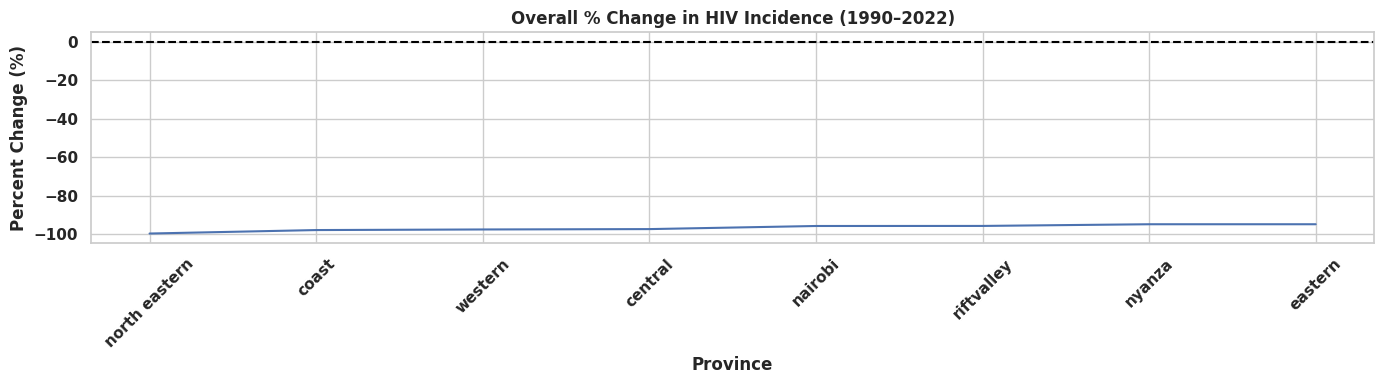

In [255]:
plt.figure(figsize=(14,4))
sns.lineplot(data=improvement_df, x='province', y='percent_change', palette='coolwarm')
plt.title('Overall % Change in HIV Incidence (1990–2022)', fontweight='bold')
plt.xlabel('Province', fontweight='bold')
plt.ylabel('Percent Change (%)', fontweight='bold')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##**The Best and worst provinces in terms of percentage change in incidence occurence**

/tmp/ipython-input-1916832866.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




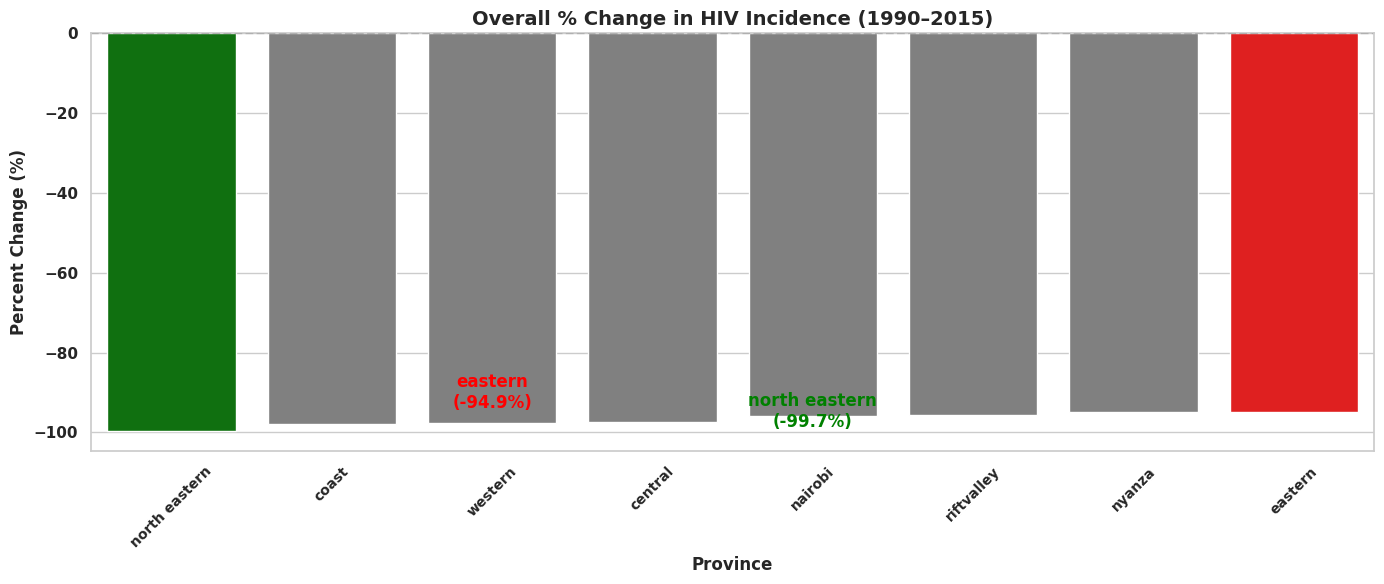

In [256]:

# Defining province columns
province_columns = ['central', 'coast', 'eastern', 'nairobi',
                    'north eastern', 'nyanza', 'riftvalley', 'western']

# Computing overall percent change from first to last year
improvement = {}
for col in province_columns:
    start = df[col].iloc[0]
    end = df[col].iloc[-1]
    improvement[col] = ((end - start) / start) * 100  # % change overall

# Converting to DataFrame
improvement_df = pd.DataFrame(list(improvement.items()), columns=['province', 'percent_change'])

# Sorting for clarity
improvement_df = improvement_df.sort_values('percent_change', ascending=True)

# Identifing best and worst performers
best_province = improvement_df.iloc[0]['province']   # most negative change
worst_province = improvement_df.iloc[-1]['province'] # most positive change

# Creating color palette
colors = []
for prov in improvement_df['province']:
    if prov == best_province:
        colors.append('green')   # best improvement
    elif prov == worst_province:
        colors.append('red')     # worst performer
    else:
        colors.append('grey')    # neutral

# Plotting
plt.figure(figsize=(14, 6))
bars = sns.barplot(data=improvement_df, x='province', y='percent_change', palette=colors)

# Customizing the plot
plt.title('Overall % Change in HIV Incidence (1990–2015)', fontsize=14, fontweight='bold')
plt.xlabel('Province', fontsize=12, fontweight='bold')
plt.ylabel('Percent Change (%)', fontsize=12, fontweight='bold')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontweight='bold')

# Annotating best and worst performers
best_value = improvement_df.iloc[0]['percent_change']
worst_value = improvement_df.iloc[-1]['percent_change']

plt.text(
    x=improvement_df.index[0],
    y=best_value,
    s=f'{best_province}\n({best_value:.1f}%)',
    color='green',
    fontweight='bold',
    ha='center',
    va='bottom'
)

plt.text(
    x=improvement_df.index[-1],
    y=worst_value,
    s=f'{worst_province}\n({worst_value:.1f}%)',
    color='red',
    fontweight='bold',
    ha='center',
    va='bottom'
)

plt.tight_layout()
plt.show()


##**Regional Incidence Distribution across the provinces**

/tmp/ipython-input-2891648150.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




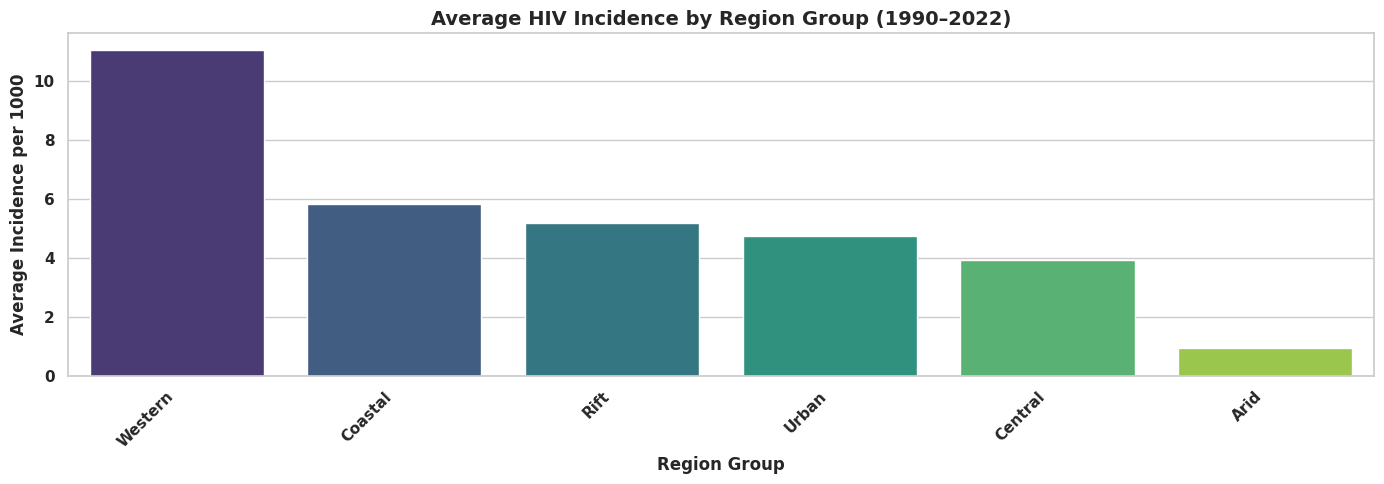

In [257]:
# Calculating average incidence per region
region_avg = df_melted.groupby('region_group')['incidence'].mean().reset_index()

# Sorting by average
region_avg = region_avg.sort_values('incidence', ascending=False)

# Plotting
plt.figure(figsize=(14, 5))
sns.barplot(data=region_avg, x='region_group', y='incidence', palette='viridis')

# Customizing
plt.title('Average HIV Incidence by Region Group (1990–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Region Group', fontsize=12, fontweight='bold')
plt.ylabel('Average Incidence per 1000', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

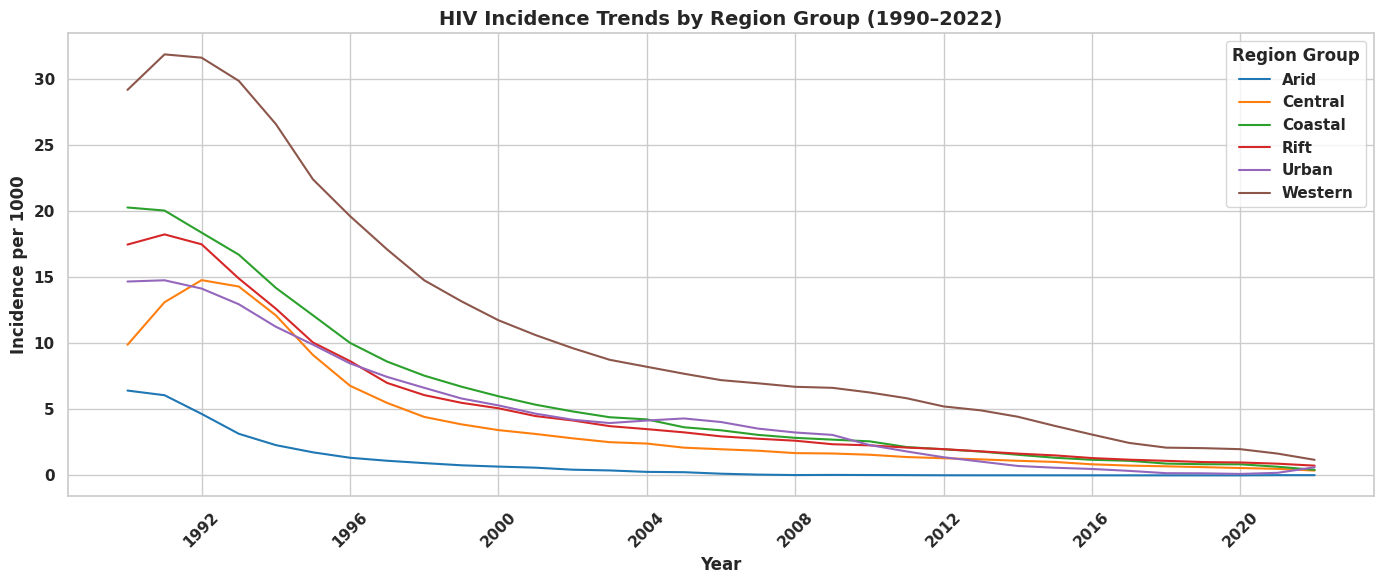

In [263]:
# Define region mapping
region_map = {
    'central': 'Central',
    'coast': 'Coastal',
    'eastern': 'Central',
    'nairobi': 'Urban',
    'north eastern': 'Arid',
    'nyanza': 'Western',
    'riftvalley': 'Rift',
    'western': 'Western'
}

# Define the real province columns to melt
province_columns_to_melt = [
    'central', 'coast', 'eastern', 'nairobi',
    'north eastern', 'nyanza', 'riftvalley', 'western'
]

# Melt the dataframe to long format and add region_group
df_melted = df.melt(
    id_vars='year',
    value_vars=province_columns_to_melt,
    var_name='province',
    value_name='incidence'
)
df_melted['region_group'] = df_melted['province'].map(region_map)


# Grouping by year and region
region_trend = df_melted.groupby(['year', 'region_group'])['incidence'].mean().reset_index()

# Plotting trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=region_trend, x='year', y='incidence', hue='region_group', palette='tab10')

# Customizing
plt.title('HIV Incidence Trends by Region Group (1990–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Incidence per 1000', fontsize=12, fontweight='bold')
plt.legend(title='Region Group')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()

## Project Summary: HIV Incidence Trends and Forecasts in Kenya (1990–2030)

###  Overview  
This project analyzes HIV incidence rates across Kenyan provinces between **1990 and 2022**, offering insights into historical trends, regional disparities, and future projections up to **2030**.  
Using a combination of **data visualization**, **feature engineering**, and **time series forecasting with Prophet**, the study aims to understand how HIV incidence has evolved across regions and estimate potential future trajectories to inform public health planning.

---

###  Data Preparation  
The dataset contains yearly HIV incidence values per 1,000 people for Kenya’s eight historical provinces:  
**Central, Coast, Eastern, Nairobi, North Eastern, Nyanza, Rift Valley, and Western**.  

**Key preprocessing steps:**
- **Data Reshaping:** The dataset was transformed from wide to long format using the `melt()` function, producing three main columns — *year*, *province*, and *incidence*.  
- **Feature Engineering:** Additional fields were created such as:  
  - **Percentage Change:** To compute annual improvement or decline rates for each province.  
  - **Regional Grouping:** Provinces were grouped into broader categories (e.g., Central, Western, Rift, Coastal, Urban, Arid) to explore regional trends.  
- **Data Cleaning:** Standardized province names (e.g., corrected “nyanza ” to “nyanza”) and ensured proper date formatting.

---

### Exploratory Data Analysis (EDA)

Comprehensive visualizations were created using **Seaborn** and **Matplotlib** to understand the trends and distributions of HIV incidence rates.

**1. National Trends:**  
A multi-line plot of all provinces (1990–2022) revealed that most provinces recorded a sharp decline in incidence after the early 2000s, aligning with national HIV intervention programs.

**2. Province-Level Analysis:**  
A `FacetGrid` was used to visualize each province’s trend separately.  
- **Nyanza** exhibited consistently higher incidence levels.  
- **North Eastern** remained the lowest throughout the period.

**3. Distribution Analysis:**  
Boxplots highlighted the variability of HIV incidence within provinces.  
Regions like **Nyanza** and **Coast** displayed greater fluctuation over time.

**4. Regional Averages:**  
Bar and pie charts showed that **Western and Coastal** regions contributed the most to the national burden, while **Central and Nairobi** had relatively lower incidence averages.

**5. Improvement Tracking:**  
Using percentage change calculations, **Central** and **Eastern** provinces showed the **fastest improvement rates** over the years.

---

###  Forecasting with Prophet  

**Goal:** Forecast HIV incidence rates up to **2030** for each province.  

**Process:**
1. Reformatted the data for Prophet (`ds` = year, `y` = incidence).  
2. Trained separate Prophet models for each province with yearly frequency.  
3. Extended the future dataframe to 2030.  
4. Predicted values (`yhat`) along with confidence intervals (`yhat_lower`, `yhat_upper`).  

**Visualization:**
- Historical trends (1990–2022) plotted in **navy**.  
- Forecasted trends (2023–2030) plotted in **orange** with confidence bands.  
- Combined charts showcased all provinces’ future trends in one visual.

**Forecast Highlights:**
- **Nyanza** continues to record the highest incidence but shows a gradual decline.  
- **North Eastern** remains the lowest throughout.  
- **Central** and **Eastern** provinces maintain strong downward trajectories.  
- Nationally, the overall trend suggests a **continued but slower decline** in HIV incidence toward 2030.

---

###  Interpretation and Insights  

1. **Regional Disparities:**  
   HIV incidence remains uneven across provinces, with Western Kenya, particularly **Nyanza**, showing higher prevalence.  

2. **Urban vs Rural Divide:**  
   Urban regions like **Nairobi** show lower rates, reflecting better healthcare access and awareness campaigns.  

3. **Policy Implications:**  
   The findings highlight the need for **targeted public health interventions** in high-burden regions and continued efforts to sustain gains in lower-incidence areas.  

4. **Forecast Significance:**  
   The Prophet models suggest that while HIV incidence will keep declining, **the rate of improvement may slow**, indicating the need for renewed policy focus and innovation.

---

###  Tools and Technologies  
- **Python Libraries:** Pandas, Matplotlib, Seaborn, Prophet  
- **Techniques:**  
  - Data reshaping (`melt`)  
  - Feature engineering (percentage change, regional grouping)  
  - Time-series forecasting (Prophet)  
  - Visualization (line plots, boxplots, pie charts, facet grids)  
- **Outputs:**  
  - PDF and PNG visualizations  
  - Interactive visuals for GitHub display  
  - Clean notebook-ready charts for analysis sharing

---

###  Conclusion  
This analysis provides a data-driven understanding of Kenya’s HIV epidemic over three decades, highlighting the **progress achieved** and **areas needing continued attention**.  
Through visualization, statistical analysis, and predictive modeling, the project offers actionable insights for policymakers and demonstrates how **data analytics can guide public health strategies**.  

**Future recommendations:**
- Incorporate **county-level or demographic data** for deeper insights.  
- Explore **socioeconomic or behavioral factors** influencing incidence rates.  
- Develop **interactive dashboards (Power BI, Plotly Dash)** for decision-makers.

---

### References / Data Sources  
- **Our World in Data:** [https://ourworldindata.org/hiv-aids]
- **Kaggle:** [https://www.kaggle.com/datasets/lindleylawrence/hiv-incidence-per-1000-population]

---

**Author:** *Brent Ochieng*  
**Project:** *HIV Incidence Analysis and Forecasting (1990–2030)*  
**Tools:** Python, Seaborn, Prophet,  
**Location:** Kenya 🇰🇪
